In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import mne
import json
import scipy.stats
import copy
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold
import random
from scipy.stats import ttest_ind
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import random
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [2]:
montage = mne.channels.read_dig_fif('montage.fif')
montage.ch_names = json.load(open("montage_ch_names.json"))
montage.dig = montage.dig[:64]
montage.ch_names = montage.ch_names[:64]
for i in range(len(montage.dig)):
    montage.dig[i]['r'] = np.array([item * 1e-6 for item in montage.dig[i]['r']])
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
for dig_info_ in ten_twenty_montage.dig:
    dig_info = copy.deepcopy(dig_info_)
    if 'EEG' not in str(dig_info['kind']):
        montage.dig.insert(0, dig_info)
picked_channels = ["FP1", "FPZ", "FP2", "AF3", "AF4", "F7", "F5", "F3", "F1", "FZ", "F2", "F4", "F6", "F8", "FT7", "FC5", "FC3", "FC1", "FCZ", "FC2", "FC4", "FC6", "FT8", "T7", "C5", "C3", "C1", "CZ", "C2", "C4", "C6", "T8", "TP7", "CP5", "CP3", "CP1", "CPZ", "CP2", "CP4", "CP6", "TP8", "P7", "P5", "P3", "P1", "PZ", "P2", "P4", "P6", "P8", "PO7", "PO5", "PO3", "POZ", "PO4", "PO6", "PO8", "O1", "OZ", "O2", ]
total_channels = ["FP1", "FPZ", "FP2", "AF3", "AF4", "F7", "F5", "F3", "F1", "FZ", "F2", "F4", "F6", "F8", "FT7", "FC5", "FC3", "FC1", "FCZ", "FC2", "FC4", "FC6", "FT8", "T7", "C5", "C3", "C1", "CZ", "C2", "C4", "C6", "T8", "TP7", "CP5", "CP3", "CP1", "CPZ", "CP2", "CP4", "CP6", "TP8", "P7", "P5", "P3", "P1", "PZ", "P2", "P4", "P6", "P8", "PO7", "PO5", "PO3", "POZ", "PO4", "PO6", "PO8", "CB1", "O1", "OZ", "O2", "CB2", ]
fake_info = mne.create_info(ch_names=total_channels, sfreq=1000., ch_types='eeg')
select_index = [idx for idx in range(len(total_channels)) if total_channels[idx] in picked_channels]

In [112]:
'''
'LAB1-huqifan','LAB1-cangyueyang','LAB1-hongyurui','LAB1-fanhao','LAB1-dongyimeng','LAB1-houlinzhi','LAB1-jiwenjun','LAB1-lujianing','LAB1-miaoshengze',
             'LAB1-wanfangwei','LAB1-wangxiaoting','LAB1-wangzhengni','LAB1-yangchen','LAB1-zhangxue'
             '''
'''
'LAB2-huqifan','LAB2-cangyueyang','LAB2-hongyurui','LAB2-fanhao','LAB2-dongyimeng','LAB2-houlinzhi','LAB2-jiwenjun','LAB2-lujianing','LAB2-miaoshengze',
             'LAB2-wanfangwei','LAB2-wangxiaoting','LAB2-wangzhengni','LAB2-yangchen','LAB2-zhangxue'
'''

"\n'LAB2-huqifan','LAB2-cangyueyang','LAB2-hongyurui','LAB2-fanhao','LAB2-dongyimeng','LAB2-houlinzhi','LAB2-jiwenjun','LAB2-lujianing','LAB2-miaoshengze',\n             'LAB2-wanfangwei','LAB2-wangxiaoting','LAB2-wangzhengni','LAB2-yangchen','LAB2-zhangxue'\n"

In [3]:
def compare_strings(A, B):
    # 检查两个字符串的长度是否相等，如果不等则直接返回 0
    if len(A) != len(B):
        return 0

    # 初始化不同字符的计数器
    diff_count = 0

    # 遍历字符串中的每个字符
    for a, b in zip(A, B):
        # 如果字符不相同
        if a != b:
            # 检查不同的字符是否是数字 1 和 2
            if (a, b) not in [('1', '2'), ('2', '1')]:
                return 0
            # 增加不同字符的计数
            diff_count += 1
            # 如果不同的字符超过一个，直接返回 0
            if diff_count > 1:
                return 0

    # 如果只有一个数字字符不同，并且这个数字是 1 和 2，返回 1，否则返回 0
    return 1 if diff_count == 1 else 0


In [4]:
#设置筛除哪些实验人物
def check_string(v):
    #if "汉武帝" in v :
    if "汉武帝" in v or "迈克" in v:
        return 0
    else:
        return 1

In [13]:
#单被试任务，二分类，对于每个被试，预测其case的field study环境设置。
dates=[  'fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
       'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing',
       'zhaochensong','chenrong']
dates_accuracy={}
dates_auc={}
dates_f1={}
feature_name="hope_features"
selected_band=3
for date in dates:
    print(date)
    X = []  # 存储EEG特征
    Y = []  # 存储对应的FIELD study倾向
    groups = []  # 存储每个样本对应的被试标识
    v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
    idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
    v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
    idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))

    for v1 in v2info_LAB1.keys():
        if v1.replace('LAB1','LAB2') not in v2info_LAB2.keys():
            print(v1)
    for v1 in v2info_LAB1.keys():
        for v2 in v2info_LAB2.keys():
            if(check_string(v1)==0):
                if(compare_strings(v1,v2)):
                    print(1)
                continue
            if(v2info_LAB1[v1]['video_type'] >=2):
                if(compare_strings(v1,v2)):
                    print(2)
                continue
            if(v2info_LAB2[v2]['video_type'] >=2):
                if(compare_strings(v1,v2)):
                    print(3)
                continue
            if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2:
                if(compare_strings(v1,v2)):
                    print(4)
                continue
            if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2:
                if(compare_strings(v1,v2)):
                    print(5)
                continue
            if(compare_strings(v1,v2)):
                #print("success",v1,v2)
                #print("v1:",v1)
                feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])
                #测试随机结果
                random_number = random.randint(0, 1)

                for i in range(feature_1.shape[0]):
                    if(feature_2.shape != feature_1.shape):
                        break
                    selected_feature_1=feature_1[:,:,selected_band]
                    selected_feature_2=feature_2[:,:,selected_band]
                    #feature = np.concatenate((selected_feature_1, selected_feature_2), axis=0)
                    #feature = np.concatenate((feature_1, feature_2), axis=0)
                    #print(selected_feature_1.shape)
                    #print(selected_feature_2.shape)
                    #feature=np.stack((selected_feature_1,selected_feature_2))
                    #print(feature.shape)
                    #print(feature.shape)
                    feature=feature_2
                    #feature=selected_feature_1
                    # 设置权重，因为 feature2 更重要，我们给它更高的权重
                    #weight1 = 0.5  # feature1 的权重
                    #weight2 = 1.0  # feature2 的权重
                    # 加权特征
                    #weighted_feature1 = feature_1 * weight1
                    #weighted_feature2 = feature_2 * weight2
                    # 合并加权后的特征
                    #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                    flattened_feature = feature[i].flatten().tolist()
                #flattened_feature=feature
                    if not X or len(flattened_feature) == len(X[0]):
                        X.append(flattened_feature)
                        Y.append(v2info_LAB2[v2]['video_type'])
                        #Y.append(random_number)
                        groups.append(v1)  # 为每个样本添加被试标识
                    else:
                        print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
            #else:
                #print("error",v1,v2)
    # 转换为NumPy数组
    X = np.array(X)
    #print(X.shape)
    Y = np.array(Y)
    print(Y)
    print(Y.shape)
    #print("Y均值：",Y.mean())
    groups = np.array(groups)
    #Y=process_labels(Y)
    #不跨被试
    # 初始化 KFold 用于5折交叉验证
    kf = KFold(n_splits=5, shuffle=True, random_state=102)
    # 初始化GroupKFold
    gkf = GroupKFold(n_splits=3)
    # 定义交叉验证器
    #kf = KFold(n_splits=2,shuffle=True, random_state=1)  # 可以自定义折数，这里使用5折交叉验证
    #用于存储每次分割的准确度和AUC
    accuracies = []
    aucs = []
    f1_scores = []

    # 进行交叉验证
    for train_idx, test_idx in gkf.split(X, Y,groups):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        #print(Y_test)
        # 初始化归一化器
        scaler = MinMaxScaler()

        # 对训练数据进行拟合和转换
        X_train_scaled = scaler.fit_transform(X_train)

        # 使用相同的归一化器转换测试数据
        X_test_scaled = scaler.transform(X_test)

        # 训练模型
        model = RandomForestClassifier()
        #model = XGBClassifier()
        model.fit(X_train_scaled, Y_train)

        # 预测并计算准确度
        Y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(Y_test, Y_pred)
        accuracies.append(accuracy)

        # 计算AUC
        Y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(Y_test, Y_pred_proba)
        aucs.append(auc)

        # 计算F1分数
        f1 = f1_score(Y_test, Y_pred)
        f1_scores.append(f1)

    # 计算平均准确度和平均AUC
    average_accuracy = np.mean(accuracies)
    average_auc = np.mean(aucs)
    average_f1 = np.mean(f1_scores)
    print("Average Accuracy:", average_accuracy)
    print("Average AUC:", average_auc)
    print("Average F1 Score:", average_f1)
    print("\n")
    dates_accuracy[date]=average_accuracy
    dates_auc[date]=average_auc
    dates_f1[date]=average_f1
full_accuracy=[]
for v in dates_accuracy.keys():
    full_accuracy.append(dates_accuracy[v])
print("所有被试平均单被试预测field study环境的准确率：",np.array(full_accuracy).mean())
full_auc=[]
for v in dates_auc.keys():
    full_auc.append(dates_auc[v])
print("所有被试平均单被试预测field study环境的AUC：",np.array(full_auc).mean())
full_f1=[]
for v in dates_f1.keys():
    full_f1.append(dates_f1[v])
print("所有被试平均单被试预测field study环境的F1 score：",np.array(full_f1).mean())

fanhao
2
2
1
2
2
1
5
2
2
2
1
2
2
2
2
1
2
2
5
2
2
5
2
5
2
2
2
2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(360,)
Average Accuracy: 0.3666666666666667
Average AUC: 0.3004320987654321
Average F1 Score: 0.4472083915676683


dongyimeng
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
1
2
2
2
2
2
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [6]:
Y.shape

(450,)

(213, 18600)
Number of 0's: 96
Number of 1's: 117
Accuracy scores for each fold: [0.51162791 0.51162791 0.51162791 0.5952381  0.5       ]
Average accuracy: 0.5260243632336656
AUC scores for each fold: [0.5826087  0.4627193  0.47368421 0.60869565 0.43249428]
Average AUC: 0.5120404271548437


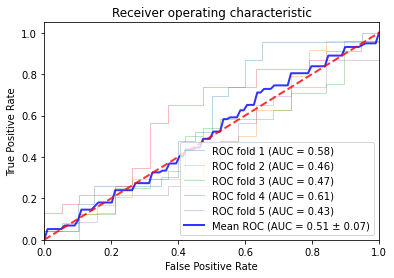

In [11]:
#跨被试任务，二分类，预测其case的field study环境设置。
dates=['fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
       'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing',
       'zhaochensong','chenrong','chenxingyu']
dates_accuracy={}
dates_auc={}
dates_f1={}
feature_name="hope_features"
selected_band=3
# 初始化全局变量
X = []  # 存储所有被试的EEG特征
Y = []  # 存储所有被试的对应的FIELD study倾向
groups = []  # 存储每个样本对应的被试标识
for date in dates:
    v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
    idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
    v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
    idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))
    for v1 in v2info_LAB1.keys():
        for v2 in v2info_LAB2.keys():
            #if(check_string(v1)==0):
                #continue
            if(v2info_LAB1[v1]['video_type'] >0):
                continue
            if(v2info_LAB2[v2]['video_type'] >0):
                continue
            if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2:
                continue
            if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2:
                continue
            if(compare_strings(v1,v2)):
                #print("v1:",v1)
                #print(str(v2info_LAB1[v1]['idx']))
                feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])

                feature_1_va= v2info_LAB1[v1]['valence']
                feature_2_va= v2info_LAB2[v2]['valence']
                feature_1_ro= v2info_LAB1[v1]['arousal']
                feature_2_ro= v2info_LAB2[v2]['arousal']
                feature_1_time= v2info_LAB1[v1]['play_duration']
                feature_2_time= v2info_LAB2[v2]['play_duration']
                feature_1_like= v2info_LAB1[v1]['like']
                feature_2_like= v2info_LAB2[v2]['like']
                feature_1_question = v2info_LAB1[v1]['question']
                feature_2_question = v2info_LAB2[v2]['question']
                
                #if(feature_1_va in [5] or feature_2_va in [5]):
                    #continue

                #测试随机结果
                random_number = random.randint(0, 1)

                #for i in range(feature_1.shape[0]):
                #for i in range(1):
                if(len(feature_1)==len(feature_2)):
                    #if(feature_2.shape != feature_1.shape):
                        #break
                    #selected_feature_1=feature_1[:,:,selected_band]
                    #selected_feature_2=feature_2[:,:,selected_band]
                    #feature = np.concatenate((selected_feature_1, selected_feature_2), axis=0)
                    feature = np.concatenate((feature_1, feature_2), axis=0)
                    #print(selected_feature_1.shape)
                    #print(selected_feature_2.shape)
                    #feature=np.stack((selected_feature_1,selected_feature_2))
                    #print(feature.shape)
                    #print(feature.shape)
                    #feature=feature_2
                    #feature=np.array([feature_1_va,feature_2_va,feature_1_ro,feature_2_ro,feature_1_like,feature_2_like,feature_1_time,feature_2_time])
                    #feature=np.array([feature_1_va,feature_2_va])
                    #feature=np.array([feature_1_like,feature_2_like])
                    #feature=np.array([feature_1_question,feature_2_question,feature_1_like,feature_2_like])
                    #feature=np.array([feature_1_question,feature_2_question])
                    #feature=np.array([feature_1_time,feature_2_time])
                    #feature=selected_feature_1
                    # 设置权重，因为 feature2 更重要，我们给它更高的权重
                    #weight1 = 0.5  # feature1 的权重
                    #weight2 = 1.0  # feature2 的权重
                    # 加权特征
                    #weighted_feature1 = feature_1 * weight1
                    #weighted_feature2 = feature_2 * weight2
                    # 合并加权后的特征
                    #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                    #flattened_feature = feature.flatten().tolist()
                    flattened_feature=feature.flatten().tolist()
                #flattened_feature=feature
                    if not X or len(flattened_feature) == len(X[0]):
                        X.append(flattened_feature)
                        Y.append(v2info_LAB2[v2]['tend'])
                        #Y.append(random_number)
                        groups.append(date)  # 为每个样本添加被试标识
                    else:
                        print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
# 转换为NumPy数组
X = np.array(X)
    #print(X.shape)
Y = np.array(Y)
print(X.shape)
    #print("Y均值：",Y.mean())
# 展示 Y 中 0 和 1 的数量
num_zeros = sum(Y == 0)
num_ones = sum(Y == 1)
print(f"Number of 0's: {num_zeros}")
print(f"Number of 1's: {num_ones}")

# 创建并训练分类模型
# 创建 SVM 分类模型
#classifier = SVC(probability=True)
# 创建梯度提升分类模型
#classifier = GradientBoostingClassifier(n_estimators=100)
# 创建 XGBoost 分类模型
classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
#classifier = RandomForestClassifier()  # 可以选择其他分类器
#classifier = RandomForestClassifier()  # 可以选择其他分类器
# 准备进行五折交叉验证并同时计算准确率和 AUC
cv = StratifiedKFold(n_splits=5)
scoring = ['accuracy', 'roc_auc']
cv_results = cross_validate(classifier, X, Y, cv=cv, scoring=scoring, return_estimator=True)

print("Accuracy scores for each fold:", cv_results['test_accuracy'])
print("Average accuracy:", np.mean(cv_results['test_accuracy']))
print("AUC scores for each fold:", cv_results['test_roc_auc'])
print("Average AUC:", np.mean(cv_results['test_roc_auc']))

# 绘制 ROC 曲线
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
tprs = []
aucs = []

for i, (train, test) in enumerate(cv.split(X, Y)):
    # 使用测试集索引来为这一折生成ROC曲线
    scores = cv_results['estimator'][i].predict_proba(X[test])[:, 1]
    fpr, tpr, _ = roc_curve(Y[test], scores)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    ax.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='blue', lw=2, alpha=0.8,
        label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', alpha=0.8)
ax.set(xlim=[0.0, 1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', ylabel='True Positive Rate', title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.show()

(159, 15)
Number of 0's: 70
Number of 1's: 89
Accuracy scores for each fold: [0.5625    0.5625    0.5625    0.4375    0.5483871]
Average accuracy: 0.5346774193548387
AUC scores for each fold: [0.63095238 0.53968254 0.72222222 0.54761905 0.55042017]
Average AUC: 0.5981792717086835


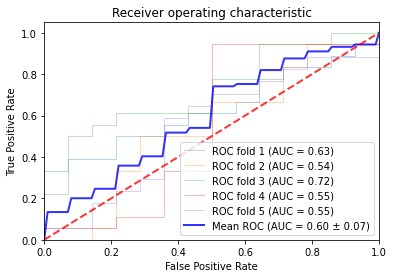

In [131]:
#跨被试任务，二分类，预测其case的field study环境设置。
dates=['fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
       'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing',
       'zhaochensong','chenrong','chenxingyu']
dates_accuracy={}
dates_auc={}
dates_f1={}
feature_name="hope_features"
selected_band=3
# 初始化全局变量
X = []  # 存储所有被试的EEG特征
Y = []  # 存储所有被试的对应的FIELD study倾向
eeg_data=[]
log_data=[]
groups = []  # 存储每个样本对应的被试标识
def check_v_in_v2info(v, v2info_LAB):
    try:
        # Attempt to access the value associated with v1 in v2info_LAB1
        value = v2info_LAB[v]
    except KeyError:
        # If v1 is not in v2info_LAB1, a KeyError exception is caught and the function returns 1
        return 1
    # If no exception is raised, it means v1 is in v2info_LAB1, and the function can return 0 or the value
    return 0
for date in dates:
    v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
    idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
    v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
    idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))
    for v1 in v2info_LAB1.keys():
        for v2 in v2info_LAB2.keys():
            if(check_string(v1)==0):
                continue
            if(v2info_LAB1[v1]['video_type'] >0):
                continue
            if(v2info_LAB2[v2]['video_type'] >0):
                continue
            v1_fu=v1.replace("正面","负面")
            v2_fu=v2.replace("正面","负面")
            if(check_v_in_v2info(v1_fu,v2info_LAB1) or check_v_in_v2info(v2_fu,v2info_LAB2)):
                continue
            if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2 or 'idx' not in v2info_LAB1[v1_fu].keys():
                continue
            if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2 or 'idx' not in v2info_LAB2[v2_fu].keys():
                continue
            if(compare_strings(v1,v2)):
                #print(date,v1)
                feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])
                feature_1_negative = np.array(idx2de_LAB1[str(v2info_LAB1[v1_fu]['idx'])])
                feature_2_negative = np.array(idx2de_LAB2[str(v2info_LAB2[v2_fu]['idx'])])
                feature_1_va= v2info_LAB1[v1]['valence']
                feature_2_va= v2info_LAB2[v2]['valence']
                feature_1_ro= v2info_LAB1[v1]['arousal']
                feature_2_ro= v2info_LAB2[v2]['arousal']
                feature_1_time= v2info_LAB1[v1]['play_duration']
                feature_2_time= v2info_LAB2[v2]['play_duration']
                feature_1_like= v2info_LAB1[v1]['like']
                feature_2_like= v2info_LAB2[v2]['like']
                feature_1_question = v2info_LAB1[v1]['question']
                feature_2_question = v2info_LAB2[v2]['question']
                feature_1_va_negative=v2info_LAB1[v1_fu]['valence']
                feature_2_va_negative=v2info_LAB2[v2_fu]['valence']
                feature_1_ro_negative= v2info_LAB1[v1_fu]['arousal']
                feature_2_ro_negative= v2info_LAB2[v2_fu]['arousal']
                feature_1_time_negative= v2info_LAB1[v1_fu]['play_duration']
                feature_2_time_negative= v2info_LAB2[v2_fu]['play_duration']
                feature_1_like_negative= v2info_LAB1[v1_fu]['like']
                feature_2_like_negative= v2info_LAB2[v2_fu]['like']
                log_data_list=[]
                #测试随机结果
                random_number = random.randint(0, 1)
                #for i in range(feature_1.shape[0]):
                if(len(feature_1)==len(feature_2_negative)):
                #for i in range(1):
                    if(feature_2.shape != feature_1.shape):
                        break
                    if(feature_2_negative.shape != feature_1_negative.shape):
                        break
                    feature = np.concatenate((feature_1, feature_2,feature_1_negative,feature_2_negative), axis=0)
                    # 合并加权后的特征
                    #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                    #print(feature[i].shape)
                    flattened_feature = feature.flatten()
                    #log_info=np.array([feature_1_va,feature_2_va,feature_1_ro,feature_2_ro,feature_1_like,feature_2_like,feature_1_time,feature_2_time])
                    if not X or len(flattened_feature) == len(X[0]):
                        X.append(flattened_feature)
                        #log_data.append(np.array([feature_1_ro,feature_2_ro,feature_1_ro_negative,feature_2_ro_negative]))
                        log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative,feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative,feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                        #log_data.append(np.array([feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative]))
                        #log_data.append(np.array([feature_1_time_negative,feature_2_time_negative]))
                        #log_data.append(np.array([feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                        #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative]))
                        eeg_data.append(flattened_feature)
                        Y.append(v2info_LAB2[v2]['tend'])
                        #Y.append(random_number)
                        groups.append(date)  # 为每个样本添加被试标识
                    else:
                        print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
# 转换为NumPy数组
X = np.array(X)
    #print(X.shape)

# 特征缩放
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_data)
eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,4) for i in range(5)]]
# 修改PCA降维的组件数量
pca = PCA(n_components=20)  # 根据需要调整n_components
eeg_pca = pca.fit_transform(eeg_scaled)
# 增加日志数据的权重
#log_data_weighted = np.tile(log_data * 2, (eeg_pca.shape[0], 1))  # 调整权重因子
# 水平合并特征
#combined_features = np.hstack((np.array(log_data), eeg_selected))
#combined_features = np.array(log_data)
combined_features = np.array(eeg_selected)
X=combined_features

Y = np.array(Y)
print(X.shape)
    #print("Y均值：",Y.mean())
# 展示 Y 中 0 和 1 的数量
num_zeros = sum(Y == 0)
num_ones = sum(Y == 1)
print(f"Number of 0's: {num_zeros}")
print(f"Number of 1's: {num_ones}")

# 创建并训练分类模型
# 创建 SVM 分类模型
#classifier = SVC(probability=True)
# 创建梯度提升分类模型
#classifier = GradientBoostingClassifier(n_estimators=100)
# 创建 XGBoost 分类模型
classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
#classifier = RandomForestClassifier()  # 可以选择其他分类器
#classifier = LogisticRegression(random_state=42)
#classifier = RandomForestClassifier()  # 可以选择其他分类器
#准备进行五折交叉验证并同时计算准确率和 AUC
cv = StratifiedKFold(n_splits=5)
scoring = ['accuracy', 'roc_auc']
cv_results = cross_validate(classifier, X, Y, cv=cv, scoring=scoring, return_estimator=True)

print("Accuracy scores for each fold:", cv_results['test_accuracy'])
print("Average accuracy:", np.mean(cv_results['test_accuracy']))
print("AUC scores for each fold:", cv_results['test_roc_auc'])
print("Average AUC:", np.mean(cv_results['test_roc_auc']))

# 绘制 ROC 曲线
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
tprs = []
aucs = []

for i, (train, test) in enumerate(cv.split(X, Y)):
    # 使用测试集索引来为这一折生成ROC曲线
    scores = cv_results['estimator'][i].predict_proba(X[test])[:, 1]
    fpr, tpr, _ = roc_curve(Y[test], scores)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    ax.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='blue', lw=2, alpha=0.8,
        label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', alpha=0.8)
ax.set(xlim=[0.0, 1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', ylabel='True Positive Rate', title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.show()

In [101]:
def get_every_results(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag,like_flag=1,time_flag=1):
    #跑各种特征组合的函数
    dates=['fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
           'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing',
           'zhaochensong','chenrong','chenxingyu']
    dates_accuracy={}
    dates_auc={}
    dates_f1={}
    feature_name="hope_features"
    selected_band=3
    # 初始化全局变量
    X = []  # 存储所有被试的EEG特征
    Y = []  # 存储所有被试的对应的FIELD study倾向
    eeg_data=[]
    log_data=[]
    groups = []  # 存储每个样本对应的被试标识
    def check_v_in_v2info(v, v2info_LAB):
        try:
            value = v2info_LAB[v]
        except KeyError:
            # If v1 is not in v2info_LAB1, a KeyError exception is caught and the function returns 1
            return 1
        # If no exception is raised, it means v1 is in v2info_LAB1, and the function can return 0 or the value
        return 0
    for date in dates:
        v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
        idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
        v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
        idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))
        for v1 in v2info_LAB1.keys():
            for v2 in v2info_LAB2.keys():
                if(check_string(v1)==0):
                    continue
                if(v2info_LAB1[v1]['video_type'] >0):
                    continue
                if(v2info_LAB2[v2]['video_type'] >0):
                    continue
                v1_fu=v1.replace("正面","负面")
                v2_fu=v2.replace("正面","负面")
                if(check_v_in_v2info(v1_fu,v2info_LAB1) or check_v_in_v2info(v2_fu,v2info_LAB2)):
                    continue
                if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2 or 'idx' not in v2info_LAB1[v1_fu].keys():
                    continue
                if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2 or 'idx' not in v2info_LAB2[v2_fu].keys():
                    continue
                if(compare_strings(v1,v2)):
                    #print(date,v1)
                    feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                    feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])
                    feature_1_negative = np.array(idx2de_LAB1[str(v2info_LAB1[v1_fu]['idx'])])
                    feature_2_negative = np.array(idx2de_LAB2[str(v2info_LAB2[v2_fu]['idx'])])
                    feature_1_va= v2info_LAB1[v1]['valence']
                    feature_2_va= v2info_LAB2[v2]['valence']
                    feature_1_ro= v2info_LAB1[v1]['arousal']
                    feature_2_ro= v2info_LAB2[v2]['arousal']
                    feature_1_time= v2info_LAB1[v1]['play_duration']
                    feature_2_time= v2info_LAB2[v2]['play_duration']
                    feature_1_like= v2info_LAB1[v1]['like']
                    feature_2_like= v2info_LAB2[v2]['like']
                    feature_1_question = v2info_LAB1[v1]['question']
                    feature_2_question = v2info_LAB2[v2]['question']
                    feature_1_familarity = v2info_LAB1[v1]['familarity']
                    feature_2_familarity = v2info_LAB2[v2]['familarity']
                    feature_1_va_negative=v2info_LAB1[v1_fu]['valence']
                    feature_2_va_negative=v2info_LAB2[v2_fu]['valence']
                    feature_1_ro_negative= v2info_LAB1[v1_fu]['arousal']
                    feature_2_ro_negative= v2info_LAB2[v2_fu]['arousal']
                    feature_1_time_negative= v2info_LAB1[v1_fu]['play_duration']
                    feature_2_time_negative= v2info_LAB2[v2_fu]['play_duration']
                    feature_1_like_negative= v2info_LAB1[v1_fu]['like']
                    feature_2_like_negative= v2info_LAB2[v2_fu]['like']
                    log_data_list=[]
                    if(behavior_flag==1):
                        like_flag=1
                        time_flag=1
                    if(like_flag==1):
                        log_data_list.append(feature_1_like)
                        log_data_list.append(feature_2_like)
                        log_data_list.append(feature_1_like_negative)
                        log_data_list.append(feature_2_like_negative)
                        #log_data_list.append(feature_2_like-feature_1_like)
                        #log_data_list.append(feature_2_like_negative-feature_1_like_negative)
                    if(time_flag==1):
                        log_data_list.append(feature_1_time)
                        log_data_list.append(feature_2_time)
                        log_data_list.append(feature_1_time_negative)
                        log_data_list.append(feature_2_time_negative)
                        #log_data_list.append(feature_2_time-feature_1_time)
                        #log_data_list.append(feature_2_time_negative-feature_1_time_negative)
                    if(affective_flag==1):
                        log_data_list.append(feature_1_va)
                        log_data_list.append(feature_2_va)
                        log_data_list.append(feature_1_va_negative)
                        log_data_list.append(feature_2_va_negative)
                    if(question_flag==1):
                        log_data_list.append(feature_1_question)
                        #log_data_list.append(feature_1_question)
                        log_data_list.append(feature_2_question)
                        #log_data_list.append(feature_2_question)
                        log_data_list.append(feature_1_familarity)
                        log_data_list.append(feature_2_familarity)
                    #测试随机结果
                    random_number = random.randint(0, 1)
                    #for i in range(feature_1.shape[0]):
                    if(len(feature_1)==len(feature_2_negative)):
                    #for i in range(1):
                        if(feature_2.shape != feature_1.shape):
                            break
                        if(feature_2_negative.shape != feature_1_negative.shape):
                            break
                        feature = np.concatenate((feature_1, feature_2,feature_1_negative,feature_2_negative), axis=0)
                        # 合并加权后的特征
                        #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                        #print(feature[i].shape)
                        flattened_feature = feature.flatten()
                        #log_info=np.array([feature_1_va,feature_2_va,feature_1_ro,feature_2_ro,feature_1_like,feature_2_like,feature_1_time,feature_2_time])
                        if not X or len(flattened_feature) == len(X[0]):
                            X.append(flattened_feature)
                            #log_data.append(np.array([feature_1_ro,feature_2_ro,feature_1_ro_negative,feature_2_ro_negative]))
                            #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative,feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative,feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                            #log_data.append(np.array([feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative]))
                            #log_data.append(np.array([feature_1_time_negative,feature_2_time_negative]))
                            #log_data.append(np.array([feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                            #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative]))
                            log_data.append(np.array(log_data_list))
                            eeg_data.append(flattened_feature)
                            Y.append(v2info_LAB2[v2]['tend'])
                            #Y.append(random_number)
                            groups.append(date)  # 为每个样本添加被试标识
                        else:
                            print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
    # 转换为NumPy数组
    X = np.array(X)
        #print(X.shape)
    # 特征缩放
    scaler = StandardScaler()
    eeg_scaled = scaler.fit_transform(eeg_data)
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,4) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in [3,4,7,11]]]
    eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in [3,4]]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in [1,2] for i in [14]]]
    # 修改PCA降维的组件数量
    pca = PCA(n_components=20)  # 根据需要调整n_components
    eeg_pca = pca.fit_transform(eeg_scaled)
    # 增加日志数据的权重
    #log_data_weighted = np.tile(log_data * 2, (eeg_pca.shape[0], 1))  # 调整权重因子
    # 水平合并特征
    #combined_features = np.hstack((np.array(log_data), eeg_selected))
    #combined_features = np.array(log_data)
    if(select_flag == 1):
        my_eeg = eeg_selected
    else:
        my_eeg = eeg_scaled
    if(eeg_flag == 0):
        combined_features = np.array(log_data)
    elif(behavior_flag+affective_flag+question_flag > 0):
        combined_features = np.hstack((np.array(log_data), my_eeg))
    else:
        combined_features = np.array(my_eeg)
    X=combined_features
    
    Y = np.array(Y)
    print(X.shape)
        #print("Y均值：",Y.mean())
    # 展示 Y 中 0 和 1 的数量
    num_zeros = sum(Y == 0)
    num_ones = sum(Y == 1)
    print(f"Number of 0's: {num_zeros}")
    print(f"Number of 1's: {num_ones}")
    
    # 创建并训练分类模型
    # 创建 SVM 分类模型
    #classifier = SVC(probability=True)
    # 创建梯度提升分类模型
    #classifier = GradientBoostingClassifier(n_estimators=100)
    #classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
    # 创建 XGBoost 分类模型
    classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    #classifier = RandomForestClassifier()  # 可以选择其他分类器
    #classifier = LogisticRegression(random_state=42)
    #classifier = RandomForestClassifier()  # 可以选择其他分类器
    #准备进行五折交叉验证并同时计算准确率和 AUC
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=36)
    scoring = ['accuracy', 'roc_auc','f1']
    cv_results = cross_validate(classifier, X, Y, cv=cv, scoring=scoring, return_estimator=True)
    
    #print("Accuracy scores for each fold:", cv_results['test_accuracy'])
    #print("Average accuracy:", np.mean(cv_results['test_accuracy']))
    #print("AUC scores for each fold:", cv_results['test_roc_auc'])
    #print("Average AUC:", np.mean(cv_results['test_roc_auc']))
    #print("F1 scores for each fold:", cv_results['test_f1'])
    #print("Average F1 score:", np.mean(cv_results['test_f1']))
    my_auc=np.mean(cv_results['test_roc_auc'])
    my_f1=np.mean(cv_results['test_f1'])
    my_acc=np.mean(cv_results['test_accuracy'])

    return my_auc,my_f1,my_acc
    

In [ ]:
def get_every_results(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag,like_flag=1,time_flag=1):
    #跑各种特征组合的函数
    dates=['fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
           'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing',
           'zhaochensong','chenrong','chenxingyu']
    dates_accuracy={}
    dates_auc={}
    dates_f1={}
    feature_name="hope_features"
    selected_band=3
    # 初始化全局变量
    X = []  # 存储所有被试的EEG特征
    Y = []  # 存储所有被试的对应的FIELD study倾向
    eeg_data=[]
    log_data=[]
    groups = []  # 存储每个样本对应的被试标识
    def check_v_in_v2info(v, v2info_LAB):
        try:
            value = v2info_LAB[v]
        except KeyError:
            # If v1 is not in v2info_LAB1, a KeyError exception is caught and the function returns 1
            return 1
        # If no exception is raised, it means v1 is in v2info_LAB1, and the function can return 0 or the value
        return 0
    for date in dates:
        v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
        idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
        v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
        idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))
        for v1 in v2info_LAB1.keys():
            for v2 in v2info_LAB2.keys():
                if(check_string(v1)==0):
                    continue
                if(v2info_LAB1[v1]['video_type'] >0):
                    continue
                if(v2info_LAB2[v2]['video_type'] >0):
                    continue
                v1_fu=v1.replace("正面","负面")
                v2_fu=v2.replace("正面","负面")
                if(check_v_in_v2info(v1_fu,v2info_LAB1) or check_v_in_v2info(v2_fu,v2info_LAB2)):
                    continue
                if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2 or 'idx' not in v2info_LAB1[v1_fu].keys():
                    continue
                if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2 or 'idx' not in v2info_LAB2[v2_fu].keys():
                    continue
                if(compare_strings(v1,v2)):
                    #print(date,v1)
                    feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                    feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])
                    feature_1_negative = np.array(idx2de_LAB1[str(v2info_LAB1[v1_fu]['idx'])])
                    feature_2_negative = np.array(idx2de_LAB2[str(v2info_LAB2[v2_fu]['idx'])])
                    feature_1_va= v2info_LAB1[v1]['valence']
                    feature_2_va= v2info_LAB2[v2]['valence']
                    feature_1_ro= v2info_LAB1[v1]['arousal']
                    feature_2_ro= v2info_LAB2[v2]['arousal']
                    feature_1_time= v2info_LAB1[v1]['play_duration']
                    feature_2_time= v2info_LAB2[v2]['play_duration']
                    feature_1_like= v2info_LAB1[v1]['like']
                    feature_2_like= v2info_LAB2[v2]['like']
                    feature_1_question = v2info_LAB1[v1]['question']
                    feature_2_question = v2info_LAB2[v2]['question']
                    feature_1_familarity = v2info_LAB1[v1]['familarity']
                    feature_2_familarity = v2info_LAB2[v2]['familarity']
                    feature_1_va_negative=v2info_LAB1[v1_fu]['valence']
                    feature_2_va_negative=v2info_LAB2[v2_fu]['valence']
                    feature_1_ro_negative= v2info_LAB1[v1_fu]['arousal']
                    feature_2_ro_negative= v2info_LAB2[v2_fu]['arousal']
                    feature_1_time_negative= v2info_LAB1[v1_fu]['play_duration']
                    feature_2_time_negative= v2info_LAB2[v2_fu]['play_duration']
                    feature_1_like_negative= v2info_LAB1[v1_fu]['like']
                    feature_2_like_negative= v2info_LAB2[v2_fu]['like']
                    log_data_list=[]
                    if(behavior_flag==1):
                        like_flag=1
                        time_flag=1
                    if(like_flag==1):
                        log_data_list.append(feature_1_like)
                        log_data_list.append(feature_2_like)
                        log_data_list.append(feature_1_like_negative)
                        log_data_list.append(feature_2_like_negative)
                        #log_data_list.append(feature_2_like-feature_1_like)
                        #log_data_list.append(feature_2_like_negative-feature_1_like_negative)
                    if(time_flag==1):
                        log_data_list.append(feature_1_time)
                        log_data_list.append(feature_2_time)
                        log_data_list.append(feature_1_time_negative)
                        log_data_list.append(feature_2_time_negative)
                        #log_data_list.append(feature_2_time-feature_1_time)
                        #log_data_list.append(feature_2_time_negative-feature_1_time_negative)
                    if(affective_flag==1):
                        log_data_list.append(feature_1_va)
                        log_data_list.append(feature_2_va)
                        log_data_list.append(feature_1_va_negative)
                        log_data_list.append(feature_2_va_negative)
                    if(question_flag==1):
                        log_data_list.append(feature_1_question)
                        #log_data_list.append(feature_1_question)
                        log_data_list.append(feature_2_question)
                        #log_data_list.append(feature_2_question)
                        log_data_list.append(feature_1_familarity)
                        log_data_list.append(feature_2_familarity)
                    #测试随机结果
                    random_number = random.randint(0, 1)
                    #for i in range(feature_1.shape[0]):
                    if(len(feature_1)==len(feature_2_negative)):
                    #for i in range(1):
                        if(feature_2.shape != feature_1.shape):
                            break
                        if(feature_2_negative.shape != feature_1_negative.shape):
                            break
                        feature = np.concatenate((feature_1, feature_2,feature_1_negative,feature_2_negative), axis=0)
                        # 合并加权后的特征
                        #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                        #print(feature[i].shape)
                        flattened_feature = feature.flatten()
                        #log_info=np.array([feature_1_va,feature_2_va,feature_1_ro,feature_2_ro,feature_1_like,feature_2_like,feature_1_time,feature_2_time])
                        if not X or len(flattened_feature) == len(X[0]):
                            X.append(flattened_feature)
                            #log_data.append(np.array([feature_1_ro,feature_2_ro,feature_1_ro_negative,feature_2_ro_negative]))
                            #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative,feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative,feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                            #log_data.append(np.array([feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative]))
                            #log_data.append(np.array([feature_1_time_negative,feature_2_time_negative]))
                            #log_data.append(np.array([feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                            #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative]))
                            log_data.append(np.array(log_data_list))
                            eeg_data.append(flattened_feature)
                            Y.append(v2info_LAB2[v2]['tend'])
                            #Y.append(random_number)
                            groups.append(date)  # 为每个样本添加被试标识
                        else:
                            print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
    # 转换为NumPy数组
    X = np.array(X)
        #print(X.shape)
    # 特征缩放
    scaler = StandardScaler()
    eeg_scaled = scaler.fit_transform(eeg_data)
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,4) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in [3,4,7,11]]]
    eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in [3,4]]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in [1,2] for i in [14]]]
    # 修改PCA降维的组件数量
    pca = PCA(n_components=20)  # 根据需要调整n_components
    eeg_pca = pca.fit_transform(eeg_scaled)
    # 增加日志数据的权重
    #log_data_weighted = np.tile(log_data * 2, (eeg_pca.shape[0], 1))  # 调整权重因子
    # 水平合并特征
    #combined_features = np.hstack((np.array(log_data), eeg_selected))
    #combined_features = np.array(log_data)
    if(select_flag == 1):
        my_eeg = eeg_selected
    else:
        my_eeg = eeg_scaled
    if(eeg_flag == 0):
        combined_features = np.array(log_data)
    elif(behavior_flag+affective_flag+question_flag > 0):
        combined_features = np.hstack((np.array(log_data), my_eeg))
    else:
        combined_features = np.array(my_eeg)
    X=combined_features
    
    Y = np.array(Y)
    print(X.shape)
        #print("Y均值：",Y.mean())
    # 展示 Y 中 0 和 1 的数量
    num_zeros = sum(Y == 0)
    num_ones = sum(Y == 1)
    print(f"Number of 0's: {num_zeros}")
    print(f"Number of 1's: {num_ones}")
    
    # 创建并训练分类模型
    # 创建 SVM 分类模型
    #classifier = SVC(probability=True)
    # 创建梯度提升分类模型
    #classifier = GradientBoostingClassifier(n_estimators=100)
    #classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
    # 创建 XGBoost 分类模型
    classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    #classifier = RandomForestClassifier()  # 可以选择其他分类器
    #classifier = LogisticRegression(random_state=42)
    #classifier = RandomForestClassifier()  # 可以选择其他分类器
    #准备进行五折交叉验证并同时计算准确率和 AUC
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=36)
    scoring = ['accuracy', 'roc_auc','f1']
    cv_results = cross_validate(classifier, X, Y, cv=cv, scoring=scoring, return_estimator=True)
    
    #print("Accuracy scores for each fold:", cv_results['test_accuracy'])
    #print("Average accuracy:", np.mean(cv_results['test_accuracy']))
    #print("AUC scores for each fold:", cv_results['test_roc_auc'])
    #print("Average AUC:", np.mean(cv_results['test_roc_auc']))
    #print("F1 scores for each fold:", cv_results['test_f1'])
    #print("Average F1 score:", np.mean(cv_results['test_f1']))
    my_auc=np.mean(cv_results['test_roc_auc'])
    my_f1=np.mean(cv_results['test_f1'])
    my_acc=np.mean(cv_results['test_accuracy'])

    return my_auc,my_f1,my_acc
    

In [368]:
#behavior降维PCA
def get_every_results(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag,py,like_flag=1,time_flag=1):
    #跑各种特征组合的函数
    dates=['fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
           'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing',
           'zhaochensong','chenrong','chenxingyu']
    dates_accuracy={}
    dates_auc={}
    dates_f1={}
    feature_name="hope_features"
    selected_band=3
    # 初始化全局变量
    X = []  # 存储所有被试的EEG特征
    Y = []  # 存储所有被试的对应的FIELD study倾向
    eeg_data=[]
    log_data=[]
    behavior_data=[]
    groups = []  # 存储每个样本对应的被试标识
    def check_v_in_v2info(v, v2info_LAB):
        try:
            value = v2info_LAB[v]
        except KeyError:
            # If v1 is not in v2info_LAB1, a KeyError exception is caught and the function returns 1
            return 1
        # If no exception is raised, it means v1 is in v2info_LAB1, and the function can return 0 or the value
        return 0
    for date in dates:
        v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
        idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
        v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
        idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))
        for v1 in v2info_LAB1.keys():
            for v2 in v2info_LAB2.keys():
                #if(check_string(v1)==0):
                    #continue
                if(v2info_LAB1[v1]['video_type'] >0):
                    continue
                if(v2info_LAB2[v2]['video_type'] >0):
                    continue
                v1_fu=v1.replace("正面","负面")
                v2_fu=v2.replace("正面","负面")
                if(check_v_in_v2info(v1_fu,v2info_LAB1) or check_v_in_v2info(v2_fu,v2info_LAB2)):
                    continue
                if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2 or 'idx' not in v2info_LAB1[v1_fu].keys():
                    continue
                if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2 or 'idx' not in v2info_LAB2[v2_fu].keys():
                    continue
                if(compare_strings(v1,v2)):
                    #print(date,v1)
                    feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                    feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])
                    feature_1_negative = np.array(idx2de_LAB1[str(v2info_LAB1[v1_fu]['idx'])])
                    feature_2_negative = np.array(idx2de_LAB2[str(v2info_LAB2[v2_fu]['idx'])])
                    feature_1_va= v2info_LAB1[v1]['valence']
                    feature_2_va= v2info_LAB2[v2]['valence']
                    feature_1_ro= v2info_LAB1[v1]['arousal']
                    feature_2_ro= v2info_LAB2[v2]['arousal']
                    feature_1_time= v2info_LAB1[v1]['play_duration']
                    feature_2_time= v2info_LAB2[v2]['play_duration']
                    feature_1_like= v2info_LAB1[v1]['like']
                    feature_2_like= v2info_LAB2[v2]['like']
                    feature_1_question = v2info_LAB1[v1]['question']
                    feature_2_question = v2info_LAB2[v2]['question']
                    feature_1_familarity = v2info_LAB1[v1]['familarity']
                    feature_2_familarity = v2info_LAB2[v2]['familarity']
                    feature_1_va_negative=v2info_LAB1[v1_fu]['valence']
                    feature_2_va_negative=v2info_LAB2[v2_fu]['valence']
                    feature_1_ro_negative= v2info_LAB1[v1_fu]['arousal']
                    feature_2_ro_negative= v2info_LAB2[v2_fu]['arousal']
                    feature_1_time_negative= v2info_LAB1[v1_fu]['play_duration']
                    feature_2_time_negative= v2info_LAB2[v2_fu]['play_duration']
                    feature_1_like_negative= v2info_LAB1[v1_fu]['like']
                    feature_2_like_negative= v2info_LAB2[v2_fu]['like']
                    log_data_list=[]
                    behavior_list=[]
                    if(behavior_flag==1):
                        like_flag=1
                        time_flag=0
                    if(like_flag==1):
                        #log_data_list.append(feature_1_like)
                        #log_data_list.append(feature_2_like)
                        #log_data_list.append(feature_1_like_negative)
                        #log_data_list.append(feature_2_like_negative)
                        behavior_list.append(feature_1_like)
                        behavior_list.append(feature_2_like)
                        behavior_list.append(feature_1_like_negative)
                        behavior_list.append(feature_2_like_negative)
                        #log_data_list.append(feature_2_like-feature_1_like)
                        #log_data_list.append(feature_2_like_negative-feature_1_like_negative)
                    if(time_flag==1):
                        #log_data_list.append(feature_1_time)
                        #log_data_list.append(feature_2_time)
                        #log_data_list.append(feature_1_time_negative)
                        #log_data_list.append(feature_2_time_negative)
                        behavior_list.append(feature_1_time)
                        behavior_list.append(feature_2_time)
                        behavior_list.append(feature_1_time_negative)
                        behavior_list.append(feature_2_time_negative)
                        #log_data_list.append(feature_2_time-feature_1_time)
                        #log_data_list.append(feature_2_time_negative-feature_1_time_negative)
                    if(affective_flag==1):
                        log_data_list.append(feature_1_va)
                        log_data_list.append(feature_2_va)
                        log_data_list.append(feature_1_va_negative)
                        log_data_list.append(feature_2_va_negative)
                    if(question_flag==1):
                        #log_data_list.append(feature_1_question)
                        #log_data_list.append(feature_1_question)
                        log_data_list.append(feature_2_question)
                        #log_data_list.append(feature_2_question)
                        #log_data_list.append(feature_1_familarity)
                        log_data_list.append(feature_2_familarity)
                    #测试随机结果
                    random_number = random.randint(0, 1)
                    #for i in range(feature_1.shape[0]):
                    if(len(feature_1)==len(feature_2_negative)):
                    #for i in range(1):
                        if(feature_2.shape != feature_1.shape):
                            break
                        if(feature_2_negative.shape != feature_1_negative.shape):
                            break
                        #feature = np.concatenate((feature_1,feature_2,feature_1_negative,feature_2_negative), axis=0)
                        feature = np.stack((feature_1, feature_2, feature_1_negative, feature_2_negative), axis=0)
                        #print(feature.shape)
                        # 合并加权后的特征
                        #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                        #print(feature[i].shape)
                        #flattened_feature = feature.flatten()
                        ave_feature=np.mean(feature,axis=1)
                        flattened_feature = ave_feature.flatten()
                        #print(ave_feature.shape)
                        #print(flattened_feature.shape)
                        #log_info=np.array([feature_1_va,feature_2_va,feature_1_ro,feature_2_ro,feature_1_like,feature_2_like,feature_1_time,feature_2_time])
                        if not X or len(flattened_feature) == len(X[0]):
                            X.append(flattened_feature)
                            #log_data.append(np.array([feature_1_ro,feature_2_ro,feature_1_ro_negative,feature_2_ro_negative]))
                            #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative,feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative,feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                            #log_data.append(np.array([feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative]))
                            #log_data.append(np.array([feature_1_time_negative,feature_2_time_negative]))
                            #log_data.append(np.array([feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                            #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative]))
                            log_data.append(np.array(log_data_list))
                            eeg_data.append(flattened_feature)
                            behavior_data.append(behavior_list)
                            Y.append(v2info_LAB2[v2]['tend'])
                            #Y.append(random_number)
                            groups.append(date)  # 为每个样本添加被试标识
                        else:
                            print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
    # 转换为NumPy数组
    X = np.array(X)
        #print(X.shape)
    # 特征缩放
    scaler = StandardScaler()
    eeg_scaled = scaler.fit_transform(eeg_data)
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,4) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in [3,4,7,11]]]
    #print(eeg_scaled.shape)
    #eeg_selected = eeg_scaled[:, [s*9300+t*310+i * 5 + j for j in range(1,3) for i in [3,4] for s in [0,1,2,3] for t in [0,1,2]]]
    #print(eeg_selected.shape)
    eeg_selected = eeg_scaled[:, [s*310+i * 5 + j for j in [2] for i in [py] for s in [0,1,2,3]]]
    # 修改PCA降维的组件数量
    pca = PCA(n_components=1)  # 根据需要调整n_components
    epca = PCA(n_components=2)  # 根据需要调整n_components
    #eeg_pca = epca.fit_transform(eeg_selected)
    #eeg_selected=eeg_pca
    if(behavior_flag==1):
        behavior_pca = pca.fit_transform(behavior_data)
    # 增加日志数据的权重
    #log_data_weighted = np.tile(log_data * 2, (eeg_pca.shape[0], 1))  # 调整权重因子
    # 水平合并特征
        log_data = np.hstack((np.array(log_data), np.array(behavior_pca))).tolist()
    behavior_pca = pca.fit_transform(behavior_data)
    print(np.array(log_data).shape)
    log_data= behavior_data
    #log_data = np.hstack((np.array(log_data), np.array(behavior_pca))).tolist()
    #combined_features = np.array(log_data)
    if(select_flag == 1):
        my_eeg = eeg_selected
    else:
        my_eeg = eeg_scaled
    if(eeg_flag == 0):
        combined_features = np.array(log_data)
    elif(behavior_flag+affective_flag+question_flag > 0):
        combined_features = np.hstack((np.array(log_data)*18600, my_eeg))
    else:
        combined_features = np.array(my_eeg)
    X=combined_features
    
    Y = np.array(Y)
    print(X.shape)
        #print("Y均值：",Y.mean())
    # 展示 Y 中 0 和 1 的数量
    num_zeros = sum(Y == 0)
    num_ones = sum(Y == 1)
    print(f"Number of 0's: {num_zeros}")
    print(f"Number of 1's: {num_ones}")
    
    # 创建并训练分类模型
    # 创建 SVM 分类模型
    #classifier = SVC(probability=True)
    # 创建梯度提升分类模型
    #classifier = GradientBoostingClassifier(n_estimators=100)
    #classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
    # 创建 XGBoost 分类模型
    classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    #classifier = RandomForestClassifier()  # 可以选择其他分类器
    #classifier = LogisticRegression(random_state=42)
    #classifier = RandomForestClassifier()  # 可以选择其他分类器
    #准备进行五折交叉验证并同时计算准确率和 AUC
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=81)
    scoring = ['accuracy', 'roc_auc','f1']
    cv_results = cross_validate(classifier, X, Y, cv=cv, scoring=scoring, return_estimator=True)
    
    #print("Accuracy scores for each fold:", cv_results['test_accuracy'])
    #print("Average accuracy:", np.mean(cv_results['test_accuracy']))
    #print("AUC scores for each fold:", cv_results['test_roc_auc'])
    #print("Average AUC:", np.mean(cv_results['test_roc_auc']))
    #print("F1 scores for each fold:", cv_results['test_f1'])
    #print("Average F1 score:", np.mean(cv_results['test_f1']))
    my_auc=np.mean(cv_results['test_roc_auc'])
    my_f1=np.mean(cv_results['test_f1'])
    my_acc=np.mean(cv_results['test_accuracy'])

    return my_auc,my_f1,my_acc
    

In [346]:
def find_channel_index(picked_channels, channel):
    try:
        # Find the index of the channel
        index = picked_channels.index(channel)
        return index
    except ValueError:
        # Channel not found
        return -1
print(find_channel_index(picked_channels,'FPZ'))

1


In [369]:
all_results={}
select_results={}
for py in [1]:
    for behavior_flag in [0]:
        for affective_flag in [0]:
            for question_flag in [0,1]:
                for select_flag in [1]:
                    for eeg_flag in [0,1]:
                        for like_flag in [0,1]:
                            for time_flag in [0,1]:
                                if(behavior_flag+affective_flag+question_flag+eeg_flag+like_flag+time_flag==0):
                                    continue
                                this_result=get_every_results(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag,py,like_flag,time_flag)
                                print("参数设置：",behavior_flag,question_flag,eeg_flag,like_flag,time_flag)
                                print(this_result,'\n')
                                all_results[(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag)]=this_result
                                if(select_flag==1):
                                    select_results[(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag)]=this_result

(201, 0)
(201, 4)
Number of 0's: 90
Number of 1's: 111
参数设置： 0 0 0 0 1
(0.5201141853315766, 0.6061867062510309, 0.5470731707317074) 

(201, 0)
(201, 4)
Number of 0's: 90
Number of 1's: 111
参数设置： 0 0 0 1 0
(0.5333662714097496, 0.6820291629476977, 0.5520731707317074) 

(201, 0)
(201, 8)
Number of 0's: 90
Number of 1's: 111
参数设置： 0 0 0 1 1
(0.5046332894158981, 0.5532285073926412, 0.49743902439024384) 



ValueError: Found array with 0 feature(s) (shape=(201, 0)) while a minimum of 1 is required by PCA.

In [351]:
# Function to convert 1/0 to 'Yes'/'No'
def yes_no_converter(tup):
    return tuple('Yes' if x == 1 else 'No' for x in tup)
# Converting the data to DataFrame
df_data = [(yes_no_converter(key) + tuple(round(val, 3)for val in values))  for key, values in select_results.items()]
df = pd.DataFrame(df_data, columns=['Behavior', 'Affective', 'Questionnaire', 'EEG Feature Selection', 'EEG Usage', 'AUC', 'F1', 'ACC'])
df_dropped = df.drop(columns=['EEG Feature Selection'])
print(df_dropped.head())  # Displaying the first few rows for verification


  Behavior Affective Questionnaire EEG Usage    AUC     F1    ACC
0       No        No            No       Yes  0.672  0.682  0.641
1       No        No           Yes        No  0.662  0.608  0.592
2       No        No           Yes       Yes  0.677  0.657  0.622
3      Yes        No            No        No  0.548  0.685  0.557
4      Yes        No            No       Yes  0.670  0.668  0.627


In [352]:
latex_table = df_dropped.to_latex(index=False)
print(latex_table)

\begin{tabular}{llllrrr}
\toprule
Behavior & Affective & Questionnaire & EEG Usage &   AUC &    F1 &   ACC \\
\midrule
      No &        No &            No &       Yes & 0.672 & 0.682 & 0.641 \\
      No &        No &           Yes &        No & 0.662 & 0.608 & 0.592 \\
      No &        No &           Yes &       Yes & 0.677 & 0.657 & 0.622 \\
     Yes &        No &            No &        No & 0.548 & 0.685 & 0.557 \\
     Yes &        No &            No &       Yes & 0.670 & 0.668 & 0.627 \\
     Yes &        No &           Yes &        No & 0.630 & 0.656 & 0.607 \\
     Yes &        No &           Yes &       Yes & 0.687 & 0.687 & 0.647 \\
\bottomrule
\end{tabular}



In [129]:
def get_every_results_withseed(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag,seed,like_flag=1,time_flag=1):
    #跑各种特征组合的函数
    dates=['fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
           'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing',
           'zhaochensong','chenrong','chenxingyu']
    dates_accuracy={}
    dates_auc={}
    dates_f1={}
    feature_name="hope_features"
    selected_band=3
    # 初始化全局变量
    X = []  # 存储所有被试的EEG特征
    Y = []  # 存储所有被试的对应的FIELD study倾向
    eeg_data=[]
    log_data=[]
    groups = []  # 存储每个样本对应的被试标识
    def check_v_in_v2info(v, v2info_LAB):
        try:
            value = v2info_LAB[v]
        except KeyError:
            # If v1 is not in v2info_LAB1, a KeyError exception is caught and the function returns 1
            return 1
        # If no exception is raised, it means v1 is in v2info_LAB1, and the function can return 0 or the value
        return 0
    for date in dates:
        v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
        idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
        v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
        idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))
        for v1 in v2info_LAB1.keys():
            for v2 in v2info_LAB2.keys():
                if(check_string(v1)==0):
                    continue
                if(v2info_LAB1[v1]['video_type'] >0):
                    continue
                if(v2info_LAB2[v2]['video_type'] >0):
                    continue
                v1_fu=v1.replace("正面","负面")
                v2_fu=v2.replace("正面","负面")
                if(check_v_in_v2info(v1_fu,v2info_LAB1) or check_v_in_v2info(v2_fu,v2info_LAB2)):
                    continue
                if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2 or 'idx' not in v2info_LAB1[v1_fu].keys():
                    continue
                if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2 or 'idx' not in v2info_LAB2[v2_fu].keys():
                    continue
                if(compare_strings(v1,v2)):
                    #print(date,v1)
                    feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                    feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])
                    feature_1_negative = np.array(idx2de_LAB1[str(v2info_LAB1[v1_fu]['idx'])])
                    feature_2_negative = np.array(idx2de_LAB2[str(v2info_LAB2[v2_fu]['idx'])])
                    feature_1_va= v2info_LAB1[v1]['valence']
                    feature_2_va= v2info_LAB2[v2]['valence']
                    feature_1_ro= v2info_LAB1[v1]['arousal']
                    feature_2_ro= v2info_LAB2[v2]['arousal']
                    feature_1_time= v2info_LAB1[v1]['play_duration']
                    feature_2_time= v2info_LAB2[v2]['play_duration']
                    feature_1_like= v2info_LAB1[v1]['like']
                    feature_2_like= v2info_LAB2[v2]['like']
                    feature_1_question = v2info_LAB1[v1]['question']
                    feature_2_question = v2info_LAB2[v2]['question']
                    feature_1_va_negative=v2info_LAB1[v1_fu]['valence']
                    feature_2_va_negative=v2info_LAB2[v2_fu]['valence']
                    feature_1_ro_negative= v2info_LAB1[v1_fu]['arousal']
                    feature_2_ro_negative= v2info_LAB2[v2_fu]['arousal']
                    feature_1_time_negative= v2info_LAB1[v1_fu]['play_duration']
                    feature_2_time_negative= v2info_LAB2[v2_fu]['play_duration']
                    feature_1_like_negative= v2info_LAB1[v1_fu]['like']
                    feature_2_like_negative= v2info_LAB2[v2_fu]['like']
                    log_data_list=[]
                    if(behavior_flag==1):
                        like_flag=1
                        time_flag=1
                    if(like_flag==1):
                        log_data_list.append(feature_1_like)
                        log_data_list.append(feature_2_like)
                        log_data_list.append(feature_1_like_negative)
                        log_data_list.append(feature_2_like_negative)
                    if(time_flag==1):
                        log_data_list.append(feature_1_time)
                        log_data_list.append(feature_2_time)
                        log_data_list.append(feature_1_time_negative)
                        log_data_list.append(feature_2_time_negative)
                    if(affective_flag==1):
                        log_data_list.append(feature_1_va)
                        log_data_list.append(feature_2_va)
                        log_data_list.append(feature_1_va_negative)
                        log_data_list.append(feature_2_va_negative)
                    if(question_flag==1):
                        log_data_list.append(feature_1_question)
                        log_data_list.append(feature_2_question)
                    #测试随机结果
                    random_number = random.randint(0, 1)
                    #for i in range(feature_1.shape[0]):
                    if(len(feature_1)==len(feature_2_negative)):
                    #for i in range(1):
                        if(feature_2.shape != feature_1.shape):
                            break
                        if(feature_2_negative.shape != feature_1_negative.shape):
                            break
                        feature = np.concatenate((feature_1, feature_2,feature_1_negative,feature_2_negative), axis=0)
                        # 合并加权后的特征
                        #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                        #print(feature[i].shape)
                        flattened_feature = feature.flatten()
                        #log_info=np.array([feature_1_va,feature_2_va,feature_1_ro,feature_2_ro,feature_1_like,feature_2_like,feature_1_time,feature_2_time])
                        if not X or len(flattened_feature) == len(X[0]):
                            X.append(flattened_feature)
                            #log_data.append(np.array([feature_1_ro,feature_2_ro,feature_1_ro_negative,feature_2_ro_negative]))
                            #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative,feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative,feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                            #log_data.append(np.array([feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative]))
                            #log_data.append(np.array([feature_1_time_negative,feature_2_time_negative]))
                            #log_data.append(np.array([feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                            #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative]))
                            log_data.append(np.array(log_data_list))
                            eeg_data.append(flattened_feature)
                            Y.append(v2info_LAB2[v2]['tend'])
                            #Y.append(random_number)
                            groups.append(date)  # 为每个样本添加被试标识
                        else:
                            print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
    # 转换为NumPy数组
    X = np.array(X)
        #print(X.shape)
    # 特征缩放
    scaler = StandardScaler()
    eeg_scaled = scaler.fit_transform(eeg_data)
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,4) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in [3,4,7,11]]]
    eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in [3,4,7,11]]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in [1,2] for i in [14]]]
    # 修改PCA降维的组件数量
    pca = PCA(n_components=20)  # 根据需要调整n_components
    eeg_pca = pca.fit_transform(eeg_scaled)
    # 增加日志数据的权重
    #log_data_weighted = np.tile(log_data * 2, (eeg_pca.shape[0], 1))  # 调整权重因子
    # 水平合并特征
    #combined_features = np.hstack((np.array(log_data), eeg_selected))
    #combined_features = np.array(log_data)
    if(select_flag == 1):
        my_eeg = eeg_selected
    else:
        my_eeg = eeg_scaled
    if(eeg_flag == 0):
        combined_features = np.array(log_data)
    elif(behavior_flag+affective_flag+question_flag > 0):
        combined_features = np.hstack((np.array(log_data), my_eeg))
    else:
        combined_features = np.array(my_eeg)
    X=combined_features
    
    Y = np.array(Y)
    print(X.shape)
        #print("Y均值：",Y.mean())
    # 展示 Y 中 0 和 1 的数量
    num_zeros = sum(Y == 0)
    num_ones = sum(Y == 1)
    print(f"Number of 0's: {num_zeros}")
    print(f"Number of 1's: {num_ones}")
    
    # 创建并训练分类模型
    # 创建 SVM 分类模型
    #classifier = SVC(probability=True)
    # 创建梯度提升分类模型
    #classifier = GradientBoostingClassifier(n_estimators=100)
    #classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
    # 创建 XGBoost 分类模型
    classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    #classifier = RandomForestClassifier()  # 可以选择其他分类器
    #classifier = LogisticRegression(random_state=42)
    #classifier = RandomForestClassifier()  # 可以选择其他分类器
    #准备进行五折交叉验证并同时计算准确率和 AUC
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    scoring = ['accuracy', 'roc_auc','f1']
    cv_results = cross_validate(classifier, X, Y, cv=cv, scoring=scoring, return_estimator=True)
    
    #print("Accuracy scores for each fold:", cv_results['test_accuracy'])
    #print("Average accuracy:", np.mean(cv_results['test_accuracy']))
    #print("AUC scores for each fold:", cv_results['test_roc_auc'])
    #print("Average AUC:", np.mean(cv_results['test_roc_auc']))
    #print("F1 scores for each fold:", cv_results['test_f1'])
    #print("Average F1 score:", np.mean(cv_results['test_f1']))
    my_auc=np.mean(cv_results['test_roc_auc'])
    my_f1=np.mean(cv_results['test_f1'])
    my_acc=np.mean(cv_results['test_accuracy'])

    return my_auc,my_f1,my_acc
    
    

In [152]:
#behavior降维PCA
def get_every_results_withseed_final(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag,seed,like_flag=1,time_flag=1):
    #跑各种特征组合的函数
    dates=['fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
           'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing',
           'zhaochensong','chenrong','chenxingyu']
    dates_accuracy={}
    dates_auc={}
    dates_f1={}
    feature_name="hope_features"
    selected_band=3
    # 初始化全局变量
    X = []  # 存储所有被试的EEG特征
    Y = []  # 存储所有被试的对应的FIELD study倾向
    eeg_data=[]
    log_data=[]
    behavior_data=[]
    groups = []  # 存储每个样本对应的被试标识
    def check_v_in_v2info(v, v2info_LAB):
        try:
            value = v2info_LAB[v]
        except KeyError:
            # If v1 is not in v2info_LAB1, a KeyError exception is caught and the function returns 1
            return 1
        # If no exception is raised, it means v1 is in v2info_LAB1, and the function can return 0 or the value
        return 0
    for date in dates:
        v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
        idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
        v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
        idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))
        for v1 in v2info_LAB1.keys():
            for v2 in v2info_LAB2.keys():
                #if(check_string(v1)==0):
                    #continue
                if(v2info_LAB1[v1]['video_type'] >0):
                    continue
                if(v2info_LAB2[v2]['video_type'] >0):
                    continue
                v1_fu=v1.replace("正面","负面")
                v2_fu=v2.replace("正面","负面")
                if(check_v_in_v2info(v1_fu,v2info_LAB1) or check_v_in_v2info(v2_fu,v2info_LAB2)):
                    continue
                if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2 or 'idx' not in v2info_LAB1[v1_fu].keys():
                    continue
                if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2 or 'idx' not in v2info_LAB2[v2_fu].keys():
                    continue
                if(compare_strings(v1,v2)):
                    #print(date,v1)
                    feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                    feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])
                    feature_1_negative = np.array(idx2de_LAB1[str(v2info_LAB1[v1_fu]['idx'])])
                    feature_2_negative = np.array(idx2de_LAB2[str(v2info_LAB2[v2_fu]['idx'])])
                    feature_1_va= v2info_LAB1[v1]['valence']
                    feature_2_va= v2info_LAB2[v2]['valence']
                    feature_1_ro= v2info_LAB1[v1]['arousal']
                    feature_2_ro= v2info_LAB2[v2]['arousal']
                    feature_1_time= v2info_LAB1[v1]['play_duration']
                    feature_2_time= v2info_LAB2[v2]['play_duration']
                    feature_1_like= v2info_LAB1[v1]['like']
                    feature_2_like= v2info_LAB2[v2]['like']
                    feature_1_question = v2info_LAB1[v1]['question']
                    feature_2_question = v2info_LAB2[v2]['question']
                    feature_1_familarity = v2info_LAB1[v1]['familarity']
                    feature_2_familarity = v2info_LAB2[v2]['familarity']
                    feature_1_va_negative=v2info_LAB1[v1_fu]['valence']
                    feature_2_va_negative=v2info_LAB2[v2_fu]['valence']
                    feature_1_ro_negative= v2info_LAB1[v1_fu]['arousal']
                    feature_2_ro_negative= v2info_LAB2[v2_fu]['arousal']
                    feature_1_time_negative= v2info_LAB1[v1_fu]['play_duration']
                    feature_2_time_negative= v2info_LAB2[v2_fu]['play_duration']
                    feature_1_like_negative= v2info_LAB1[v1_fu]['like']
                    feature_2_like_negative= v2info_LAB2[v2_fu]['like']
                    log_data_list=[]
                    behavior_list=[]
                    if(behavior_flag==1):
                        like_flag=1
                        time_flag=1
                    if(like_flag==1):
                        #log_data_list.append(feature_1_like)
                        #log_data_list.append(feature_2_like)
                        #log_data_list.append(feature_1_like_negative)
                        #log_data_list.append(feature_2_like_negative)
                        behavior_list.append(feature_1_like)
                        behavior_list.append(feature_2_like)
                        behavior_list.append(feature_1_like_negative)
                        behavior_list.append(feature_2_like_negative)
                        #log_data_list.append(feature_2_like-feature_1_like)
                        #log_data_list.append(feature_2_like_negative-feature_1_like_negative)
                    if(time_flag==1):
                        #log_data_list.append(feature_1_time)
                        #log_data_list.append(feature_2_time)
                        #log_data_list.append(feature_1_time_negative)
                        #log_data_list.append(feature_2_time_negative)
                        behavior_list.append(feature_1_time)
                        behavior_list.append(feature_2_time)
                        behavior_list.append(feature_1_time_negative)
                        behavior_list.append(feature_2_time_negative)
                        #log_data_list.append(feature_2_time-feature_1_time)
                        #log_data_list.append(feature_2_time_negative-feature_1_time_negative)
                    if(affective_flag==1):
                        log_data_list.append(feature_1_va)
                        log_data_list.append(feature_2_va)
                        log_data_list.append(feature_1_va_negative)
                        log_data_list.append(feature_2_va_negative)
                    if(question_flag==1):
                        #log_data_list.append(feature_1_question)
                        #log_data_list.append(feature_1_question)
                        log_data_list.append(feature_2_question)
                        #log_data_list.append(feature_2_question)
                        #log_data_list.append(feature_1_familarity)
                        log_data_list.append(feature_2_familarity)
                    #测试随机结果
                    random_number = random.randint(0, 1)
                    #for i in range(feature_1.shape[0]):
                    if(len(feature_1)==len(feature_2_negative)):
                    #for i in range(1):
                        if(feature_2.shape != feature_1.shape):
                            break
                        if(feature_2_negative.shape != feature_1_negative.shape):
                            break
                        feature = np.concatenate((feature_1, feature_2,feature_1_negative,feature_2_negative), axis=0)
                        # 合并加权后的特征
                        #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                        #print(feature[i].shape)
                        flattened_feature = feature.flatten()
                        #log_info=np.array([feature_1_va,feature_2_va,feature_1_ro,feature_2_ro,feature_1_like,feature_2_like,feature_1_time,feature_2_time])
                        if not X or len(flattened_feature) == len(X[0]):
                            X.append(flattened_feature)
                            #log_data.append(np.array([feature_1_ro,feature_2_ro,feature_1_ro_negative,feature_2_ro_negative]))
                            #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative,feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative,feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                            #log_data.append(np.array([feature_1_time,feature_2_time,feature_1_time_negative,feature_2_time_negative]))
                            #log_data.append(np.array([feature_1_time_negative,feature_2_time_negative]))
                            #log_data.append(np.array([feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                            #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative]))
                            log_data.append(np.array(log_data_list))
                            eeg_data.append(flattened_feature)
                            behavior_data.append(behavior_list)
                            Y.append(v2info_LAB2[v2]['tend'])
                            #Y.append(random_number)
                            groups.append(date)  # 为每个样本添加被试标识
                        else:
                            print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
    # 转换为NumPy数组
    X = np.array(X)
        #print(X.shape)
    # 特征缩放
    scaler = StandardScaler()
    eeg_scaled = scaler.fit_transform(eeg_data)
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,4) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in [3,4,7,11]]]
    eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in [3,4]]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in [1,2] for i in [14]]]
    # 修改PCA降维的组件数量
    #eeg_pca = pca.fit_transform(eeg_scaled)
    pca = PCA(n_components=1)  # 根据需要调整n_components
    if(behavior_flag==1):
        behavior_pca = pca.fit_transform(behavior_data)
    # 增加日志数据的权重
    #log_data_weighted = np.tile(log_data * 2, (eeg_pca.shape[0], 1))  # 调整权重因子
    # 水平合并特征
        log_data = np.hstack((np.array(log_data), np.array(behavior_pca))).tolist()
    #combined_features = np.array(log_data)
    if(select_flag == 1):
        my_eeg = eeg_selected
    else:
        my_eeg = eeg_scaled
    if(eeg_flag == 0):
        combined_features = np.array(log_data)
    elif(behavior_flag+affective_flag+question_flag > 0):
        combined_features = np.hstack((np.array(log_data), my_eeg))
    else:
        combined_features = np.array(my_eeg)
    X=combined_features
    
    Y = np.array(Y)
    print(X.shape)
        #print("Y均值：",Y.mean())
    # 展示 Y 中 0 和 1 的数量
    num_zeros = sum(Y == 0)
    num_ones = sum(Y == 1)
    print(f"Number of 0's: {num_zeros}")
    print(f"Number of 1's: {num_ones}")
    
    # 创建并训练分类模型
    # 创建 SVM 分类模型
    #classifier = SVC(probability=True)
    # 创建梯度提升分类模型
    #classifier = GradientBoostingClassifier(n_estimators=100)
    #classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
    # 创建 XGBoost 分类模型
    classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    #classifier = RandomForestClassifier()  # 可以选择其他分类器
    #classifier = LogisticRegression(random_state=42)
    #classifier = RandomForestClassifier()  # 可以选择其他分类器
    #准备进行五折交叉验证并同时计算准确率和 AUC
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    scoring = ['accuracy', 'roc_auc','f1']
    cv_results = cross_validate(classifier, X, Y, cv=cv, scoring=scoring, return_estimator=True)
    
    #print("Accuracy scores for each fold:", cv_results['test_accuracy'])
    #print("Average accuracy:", np.mean(cv_results['test_accuracy']))
    #print("AUC scores for each fold:", cv_results['test_roc_auc'])
    #print("Average AUC:", np.mean(cv_results['test_roc_auc']))
    #print("F1 scores for each fold:", cv_results['test_f1'])
    #print("Average F1 score:", np.mean(cv_results['test_f1']))
    my_auc=np.mean(cv_results['test_roc_auc'])
    my_f1=np.mean(cv_results['test_f1'])
    my_acc=np.mean(cv_results['test_accuracy'])

    return my_auc,my_f1,my_acc
    

In [153]:
all_results={}
select_results={}
select_flag=1
like_flag=0
time_flag=0
#随机选取10000以内的数字作为随机种子
seeds = [random.randint(0, 9999) for _ in range(10)]
print(seeds)
for behavior_flag in [0,1]:
    for affective_flag in [0]:
        for question_flag in [0,1]:
            for eeg_flag in [0,1]:
                for seed in seeds:
                    for like_flag in [0]:
                        for time_flag in [0]:
                            if(behavior_flag+affective_flag+question_flag+eeg_flag+like_flag+time_flag==0):
                                continue
                            this_result=get_every_results_withseed_final(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag,seed,like_flag,time_flag)
                            print("参数设置：",behavior_flag,question_flag,eeg_flag,seed)
                            print(this_result,'\n')
                            all_results[(behavior_flag,question_flag,eeg_flag,seed)]=this_result
                            #if(select_flag==1):
                                #select_results[(behavior_flag,affective_flag,question_flag,eeg_flag)]=this_result

[2999, 894, 5198, 4395, 8849, 3875, 2612, 766, 12, 3684]
(201, 1)
Number of 0's: 90
Number of 1's: 111
参数设置： 1 0 0 2999
(0.5367698726394379, 0.5497269419395665, 0.5267073170731706) 

(201, 1)
Number of 0's: 90
Number of 1's: 111
参数设置： 1 0 0 894
(0.5094532279314887, 0.5413744586023108, 0.5026829268292683) 

(201, 1)
Number of 0's: 90
Number of 1's: 111
参数设置： 1 0 0 5198
(0.5047211242863417, 0.48926737132686793, 0.4778048780487804) 

(201, 1)
Number of 0's: 90
Number of 1's: 111
参数设置： 1 0 0 4395
(0.4533377250768556, 0.4717106354737016, 0.43341463414634146) 

(201, 1)
Number of 0's: 90
Number of 1's: 111
参数设置： 1 0 0 8849
(0.4916227492314449, 0.5308185713847999, 0.4774390243902439) 

(201, 1)
Number of 0's: 90
Number of 1's: 111
参数设置： 1 0 0 3875
(0.4675999121651295, 0.5039729527333598, 0.46768292682926826) 

(201, 1)
Number of 0's: 90
Number of 1's: 111
参数设置： 1 0 0 2612
(0.5348594642072902, 0.5255433455433456, 0.4979268292682927) 

(201, 1)
Number of 0's: 90
Number of 1's: 111
参数设置： 1 0 0 7

KeyboardInterrupt: 

In [139]:
all_results

{(0, 0, 1, 3430): (0.6426218708827405, 0.6167701404286771, 0.5770731707317074),
 (0, 0, 1, 5044): (0.6704984628897673, 0.6819619216815249, 0.6520731707317073),
 (0, 0, 1, 8748): (0.6759332454984629, 0.6529231885082412, 0.6124390243902439),
 (0, 0, 1, 6616): (0.6430939833113747, 0.632913104758403, 0.5970731707317073),
 (0, 0, 1, 4668): (0.6648221343873517, 0.6589608597062013, 0.6165853658536586),
 (0, 0, 1, 9766): (0.620860781730347, 0.6198011322693754, 0.6018292682926829),
 (0, 0, 1, 2175): (0.6437966622749232, 0.6479990602469788, 0.6119512195121951),
 (0, 0, 1, 6669): (0.686945542380325, 0.6690544669638101, 0.6313414634146343),
 (0, 0, 1, 3909): (0.6250878348704434, 0.650144044471274, 0.6068292682926829),
 (0, 0, 1, 8935): (0.6349582784365393, 0.6459459147782968, 0.6019512195121951),
 (0, 1, 0, 3430): (0.6516798418972332, 0.6372720195019848, 0.5917073170731707),
 (0, 1, 0, 5044): (0.6600131752305666, 0.5989766843255214, 0.5871951219512195),
 (0, 1, 0, 8748): (0.6699055775142732, 0.651

In [143]:
def average_performance(all_results):
    """
    Calculate the average performance for each unique combination of behavior_flag, affective_flag, question_flag, and eeg_flag.

    :param all_results: Dictionary with keys as (behavior_flag, affective_flag, question_flag, eeg_flag, seed) 
                        and values as (AUC, F1, ACC)
    :return: A new dictionary with the average performance for each unique combination of the first four flags
    """
    # Dictionary to store the sum of values and count for averaging
    performance_sum = {}
    performance_count = {}

    # Iterate through the dictionary and accumulate the sums and counts
    for key, value in all_results.items():
        # The first four items of the key are the flags
        flags = key[:3]

        # Initialize the dictionary entries if not present
        if flags not in performance_sum:
            performance_sum[flags] = [0, 0, 0]  # AUC, F1, ACC
            performance_count[flags] = 0

        # Accumulate the sums and count
        performance_sum[flags] = [sum(x) for x in zip(performance_sum[flags], value)]
        performance_count[flags] += 1

    # Calculate the average performance
    average_performance = {flags: [value / performance_count[flags] for value in values] 
                           for flags, values in performance_sum.items()}

    return average_performance
average_results = average_performance(all_results)

In [144]:
average_results

{(0, 0, 1): [0.6508618796662275, 0.6476473833812781, 0.6109146341463415],
 (0, 1, 0): [0.6572584541062803, 0.6304561482166667, 0.5884634146341463],
 (0, 1, 1): [0.6742259552042161, 0.6643638022738674, 0.6289878048780488],
 (1, 0, 0): [0.5258761528326745, 0.5407859554800215, 0.4974512195121951],
 (1, 0, 1): [0.6222222222222221, 0.6323069541619347, 0.5885],
 (1, 1, 0): [0.6231664470794905, 0.6429615314374673, 0.6035853658536585],
 (1, 1, 1): [0.6689064558629776, 0.6559212259441968, 0.6163414634146341]}

In [146]:
# Function to convert 1/0 to 'Yes'/'No'
def yes_no_converter(tup):
    return tuple('Yes' if x == 1 else 'No' for x in tup)
# Converting the data to DataFrame
df_data = [(yes_no_converter(key) + tuple(round(val, 3)for val in values))  for key, values in average_results.items()]
df = pd.DataFrame(df_data, columns=['Behavior','Questionnaire','EEG', 'AUC', 'F1', 'ACC'])
#df_dropped = df.drop(columns=['EEG Feature Selection'])
#print(df_dropped.head())  # Displaying the first few rows for verification
latex_table = df.to_latex(index=False)
print(latex_table)

\begin{tabular}{lllrrr}
\toprule
Behavior & Questionnaire & EEG &   AUC &    F1 &   ACC \\
\midrule
      No &            No & Yes & 0.651 & 0.648 & 0.611 \\
      No &           Yes &  No & 0.657 & 0.630 & 0.588 \\
      No &           Yes & Yes & 0.674 & 0.664 & 0.629 \\
     Yes &            No &  No & 0.526 & 0.541 & 0.497 \\
     Yes &            No & Yes & 0.622 & 0.632 & 0.588 \\
     Yes &           Yes &  No & 0.623 & 0.643 & 0.604 \\
     Yes &           Yes & Yes & 0.669 & 0.656 & 0.616 \\
\bottomrule
\end{tabular}



In [209]:
#每个被试的AUC箱线图
def cross_validate_subject(X, Y, groups, subject_name):
    # 选择指定被试的数据
    subject_mask = np.array(groups) == subject_name
    X_subject = X[subject_mask]
    Y_subject = Y[subject_mask]
    # 检查 Y_subject 中类别 0 的数量是否小于2或大于8
    num_zeros = np.sum(Y_subject == 0)
    if num_zeros < 3 or num_zeros > 7:
        # 如果条件成立，无法计算 AUC，返回 None 或适当的值
        print(f"Subject {subject_name} has imbalanced classes and will be discarded.")
        return None
    
    # 由于数据可能需要标准化，我们在交叉验证内进行标准化以防止数据泄露
    def cross_val_with_scaling(classifier, X, Y, cv):
        auc_scores = []
        for train_idx, test_idx in cv.split(X, Y):
            # 在每次迭代中分别标准化训练和测试数据
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X[train_idx])
            X_test_scaled = scaler.transform(X[test_idx])
            
            # 训练分类器
            classifier.fit(X_train_scaled, Y[train_idx])
            
            # 预测测试集并计算 AUC
            Y_pred = classifier.predict_proba(X_test_scaled)[:, 1]
            auc_score = roc_auc_score(Y[test_idx], Y_pred)
            auc_scores.append(auc_score)
        
        return np.array(auc_scores)
    
    # 定义分类器
    classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    
    # 定义三折交叉验证
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    # 计算 AUC 分数
    auc_scores = cross_val_with_scaling(classifier, X_subject, Y_subject, cv)
    
    # 返回平均 AUC 分数
    return auc_scores

In [223]:
def cross_validate_subject(X, Y, groups, subject_name):
    # 选择指定被试的数据
    subject_mask = np.array(groups) == subject_name
    X_subject = X[subject_mask]
    Y_subject = Y[subject_mask]
    print(X_subject.shape)

    # 由于数据可能需要标准化，我们在交叉验证内进行标准化以防止数据泄露
    def cross_val_with_scaling(classifier, X, Y, cv):
        auc_scores = []
        for train_idx, test_idx in cv.split(X, Y):
            # 在每次迭代中分别标准化训练和测试数据
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X[train_idx])
            X_test_scaled = scaler.transform(X[test_idx])

            # 训练分类器
            classifier.fit(X_train_scaled, Y[train_idx])

            # 预测测试集并计算 AUC
            try:
                Y_pred = classifier.predict_proba(X_test_scaled)[:, 1]
                auc_score = roc_auc_score(Y[test_idx], Y_pred)
                auc_scores.append(auc_score)
            except ValueError:
                # 如果类别不足以计算 AUC，捕获异常并返回 None
                print(f"AUC score cannot be calculated for subject {subject_name} due to insufficient class variety.")
                return None

        return np.array(auc_scores)

    # 定义分类器
    classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # 定义三折交叉验证
    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

    # 计算 AUC 分数
    try:
        auc_scores = cross_val_with_scaling(classifier, X_subject, Y_subject, cv)
    except ValueError:
        # 如果类别不足以计算 AUC，捕获异常并返回 None
        print(f"AUC score cannot be calculated for subject {subject_name} due to insufficient class variety.")
        return None

    # 返回 AUC 分数
    return auc_scores


In [226]:
def cross_validate_leave_one_subject_out(X, Y, groups, test_subject):
    # 分离出测试被试的数据
    test_mask = np.array(groups) == test_subject
    X_test = X[test_mask]
    Y_test = Y[test_mask]

    # 分离出训练数据（不包括测试被试的数据）
    X_train = X[~test_mask]
    Y_train = Y[~test_mask]

    # 定义分类器
    classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # 定义五折交叉验证
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # 初始化 AUC 分数列表
    auc_scores = []

    # 交叉验证
    for train_idx, _ in cv.split(X_train, Y_train):
        # 分割训练集
        X_train_fold, Y_train_fold = X_train[train_idx], Y_train[train_idx]

        # 标准化数据
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_test_scaled = scaler.transform(X_test)

        # 训练分类器
        classifier.fit(X_train_scaled, Y_train_fold)

        # 预测测试集并计算 AUC
        Y_pred = classifier.predict_proba(X_test_scaled)[:, 1]
        auc_score = roc_auc_score(Y_test, Y_pred)
        auc_scores.append(auc_score)

    return np.array(auc_scores)

In [227]:
def get_every_results_withplot(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag):
    #跑各种特征组合的函数
    dates=['fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
           'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing',
           'zhaochensong','chenrong','chenxingyu']
    dates_accuracy={}
    dates_auc={}
    dates_f1={}
    feature_name="hope_features"
    selected_band=3
    # 初始化全局变量
    X = []  # 存储所有被试的EEG特征
    Y = []  # 存储所有被试的对应的FIELD study倾向
    eeg_data=[]
    log_data=[]
    groups = []  # 存储每个样本对应的被试标识
    def check_v_in_v2info(v, v2info_LAB):
        try:
            value = v2info_LAB[v]
        except KeyError:
            # If v1 is not in v2info_LAB1, a KeyError exception is caught and the function returns 1
            return 1
        # If no exception is raised, it means v1 is in v2info_LAB1, and the function can return 0 or the value
        return 0
    for date in dates:
        v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
        idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
        v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
        idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))
        for v1 in v2info_LAB1.keys():
            for v2 in v2info_LAB2.keys():
                if(check_string(v1)==0):
                    continue
                if(v2info_LAB1[v1]['video_type'] >0):
                    continue
                if(v2info_LAB2[v2]['video_type'] >0):
                    continue
                v1_fu=v1.replace("正面","负面")
                v2_fu=v2.replace("正面","负面")
                if(check_v_in_v2info(v1_fu,v2info_LAB1) or check_v_in_v2info(v2_fu,v2info_LAB2)):
                    continue
                if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2 or 'idx' not in v2info_LAB1[v1_fu].keys():
                    continue
                if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2 or 'idx' not in v2info_LAB2[v2_fu].keys():
                    continue
                if(compare_strings(v1,v2)):
                    #print(date,v1)
                    feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                    feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])
                    feature_1_negative = np.array(idx2de_LAB1[str(v2info_LAB1[v1_fu]['idx'])])
                    feature_2_negative = np.array(idx2de_LAB2[str(v2info_LAB2[v2_fu]['idx'])])
                    feature_1_va= v2info_LAB1[v1]['valence']
                    feature_2_va= v2info_LAB2[v2]['valence']
                    feature_1_ro= v2info_LAB1[v1]['arousal']
                    feature_2_ro= v2info_LAB2[v2]['arousal']
                    feature_1_time= v2info_LAB1[v1]['play_duration']
                    feature_2_time= v2info_LAB2[v2]['play_duration']
                    feature_1_like= v2info_LAB1[v1]['like']
                    feature_2_like= v2info_LAB2[v2]['like']
                    feature_1_question = v2info_LAB1[v1]['question']
                    feature_2_question = v2info_LAB2[v2]['question']
                    feature_1_va_negative=v2info_LAB1[v1_fu]['valence']
                    feature_2_va_negative=v2info_LAB2[v2_fu]['valence']
                    feature_1_ro_negative= v2info_LAB1[v1_fu]['arousal']
                    feature_2_ro_negative= v2info_LAB2[v2_fu]['arousal']
                    feature_1_time_negative= v2info_LAB1[v1_fu]['play_duration']
                    feature_2_time_negative= v2info_LAB2[v2_fu]['play_duration']
                    feature_1_like_negative= v2info_LAB1[v1_fu]['like']
                    feature_2_like_negative= v2info_LAB2[v2_fu]['like']
                    log_data_list=[]
                    if(behavior_flag==1):
                        log_data_list.append(feature_1_like)
                        log_data_list.append(feature_2_like)
                        log_data_list.append(feature_1_like_negative)
                        log_data_list.append(feature_2_like_negative)
                        log_data_list.append(feature_1_time)
                        log_data_list.append(feature_2_time)
                        log_data_list.append(feature_1_time_negative)
                        log_data_list.append(feature_2_time_negative)
                    if(affective_flag==1):
                        log_data_list.append(feature_1_va)
                        log_data_list.append(feature_2_va)
                        log_data_list.append(feature_1_va_negative)
                        log_data_list.append(feature_2_va_negative)
                    if(question_flag==1):
                        log_data_list.append(feature_1_question)
                        log_data_list.append(feature_2_question)
                    #测试随机结果
                    random_number = random.randint(0, 1)
                    #for i in range(feature_1.shape[0]):
                    if(len(feature_1)==len(feature_2_negative)):
                    #for i in range(1):
                        if(feature_2.shape != feature_1.shape):
                            break
                        if(feature_2_negative.shape != feature_1_negative.shape):
                            break
                        feature = np.concatenate((feature_1, feature_2,feature_1_negative,feature_2_negative), axis=0)
                        # 合并加权后的特征
                        #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                        #print(feature[i].shape)
                        flattened_feature = feature.flatten()
                        #log_info=np.array([feature_1_va,feature_2_va,feature_1_ro,feature_2_ro,feature_1_like,feature_2_like,feature_1_time,feature_2_time])
                        if not X or len(flattened_feature) == len(X[0]):
                            X.append(flattened_feature)
                            log_data.append(np.array(log_data_list))
                            eeg_data.append(flattened_feature)
                            Y.append(v2info_LAB2[v2]['tend'])
                            #Y.append(random_number)
                            groups.append(date)  # 为每个样本添加被试标识
                        else:
                            print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
    # 转换为NumPy数组
    X = np.array(X)
        #print(X.shape)
    # 特征缩放
    scaler = StandardScaler()
    #eeg_scaled = scaler.fit_transform(eeg_data)
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,4) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in range(5)]]
    eeg_selected = np.array(eeg_data)[:, [i * 5 + j for j in range(1,3) for i in [3,4,7,11]]]
    # 修改PCA降维的组件数量
    #pca = PCA(n_components=20)  # 根据需要调整n_components
    #eeg_pca = pca.fit_transform(eeg_scaled)
    # 增加日志数据的权重
    #log_data_weighted = np.tile(log_data * 2, (eeg_pca.shape[0], 1))  # 调整权重因子
    # 水平合并特征
    #combined_features = np.hstack((np.array(log_data), eeg_selected))
    #combined_features = np.array(log_data)
    if(select_flag == 1):
        my_eeg = eeg_selected
    else:
        my_eeg = eeg_scaled
    if(eeg_flag == 0):
        combined_features = np.array(log_data)
    elif(behavior_flag+affective_flag+question_flag > 0):
        combined_features = np.hstack((np.array(log_data), my_eeg))
    else:
        combined_features = np.array(my_eeg)
    X=combined_features
    Y = np.array(Y)
    print(X.shape)
        #print("Y均值：",Y.mean())
    # 展示 Y 中 0 和 1 的数量
    num_zeros = sum(Y == 0)
    num_ones = sum(Y == 1)
    print(f"Number of 0's: {num_zeros}")
    print(f"Number of 1's: {num_ones}")

    dates_auc = {}
    
    for date in dates:
        #date_auc_scores = cross_validate_subject(X,Y,groups,date)
        date_auc_scores = cross_validate_leave_one_subject_out(X,Y,groups,date)
        if date_auc_scores is not None:
            dates_auc[date] = date_auc_scores
    return dates_auc

(159, 22)
Number of 0's: 70
Number of 1's: 89


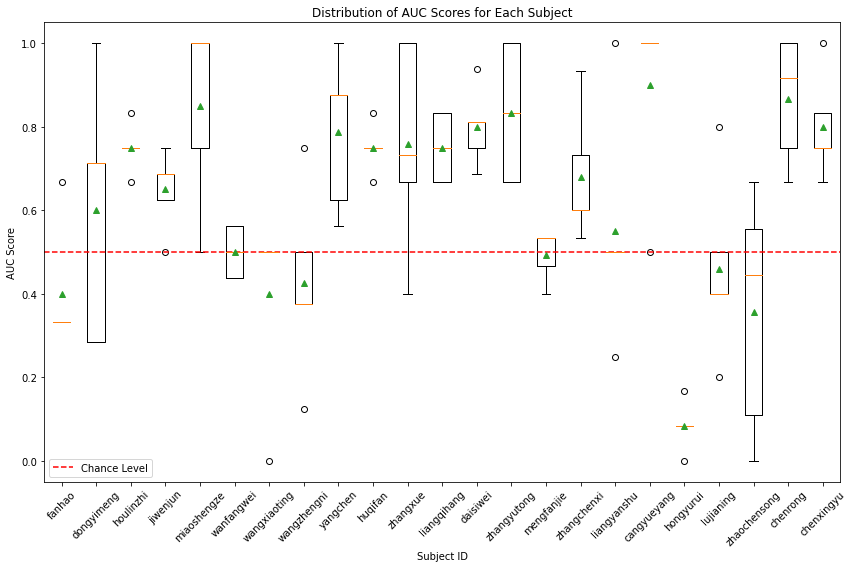

In [228]:
dates_auc=get_every_results_withplot(1,1,1,1,1)

In [229]:
print(dates_auc)

{'fanhao': array([0.33333333, 0.66666667, 0.33333333, 0.33333333, 0.33333333]), 'dongyimeng': array([0.71428571, 0.28571429, 1.        , 0.71428571, 0.28571429]), 'houlinzhi': array([0.75      , 0.83333333, 0.66666667, 0.75      , 0.75      ]), 'jiwenjun': array([0.75  , 0.6875, 0.5   , 0.6875, 0.625 ]), 'miaoshengze': array([0.75, 1.  , 0.5 , 1.  , 1.  ]), 'wanfangwei': array([0.5   , 0.4375, 0.4375, 0.5625, 0.5625]), 'wangxiaoting': array([0.5, 0.5, 0.5, 0. , 0.5]), 'wangzhengni': array([0.375, 0.125, 0.75 , 0.375, 0.5  ]), 'yangchen': array([0.875 , 0.625 , 0.5625, 0.875 , 1.    ]), 'huqifan': array([0.75      , 0.75      , 0.66666667, 0.83333333, 0.75      ]), 'zhangxue': array([1.        , 0.4       , 0.66666667, 0.73333333, 1.        ]), 'liangqihang': array([0.66666667, 0.83333333, 0.66666667, 0.83333333, 0.75      ]), 'daisiwei': array([0.75  , 0.8125, 0.6875, 0.9375, 0.8125]), 'zhangyutong': array([1.        , 0.83333333, 0.66666667, 1.        , 0.66666667]), 'mengfanjie': arr

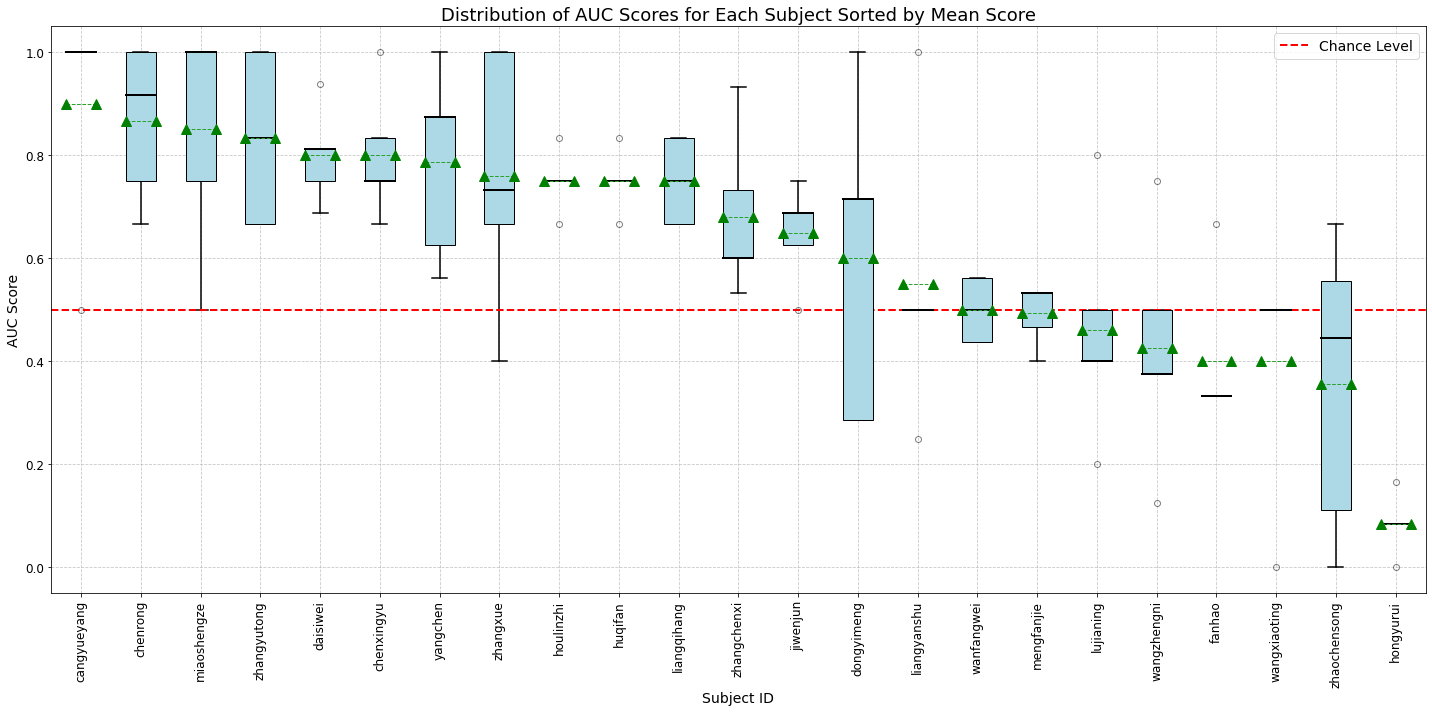

In [235]:
# Prepare the data for plotting
labels = list(dates_auc.keys())
auc_scores = [dates_auc[subject] for subject in labels]
mean_scores = [np.mean(score) for score in auc_scores]

# Combine labels and mean scores into a list of tuples and sort them by mean scores in descending order
sorted_labels_scores = sorted(zip(labels, auc_scores, mean_scores), key=lambda x: x[2], reverse=True)

# Unzip the sorted tuples back into separate lists
sorted_labels, sorted_auc_scores, _ = zip(*sorted_labels_scores)

# Plotting
plt.figure(figsize=(20, 10))
bp = plt.boxplot(sorted_auc_scores, labels=sorted_labels, patch_artist=True, showmeans=True, meanline=True)

# Customizing the plot's appearance
plt.setp(bp['medians'], color='black', linewidth=2)
plt.setp(bp['means'], marker='^', markerfacecolor='green', markeredgecolor='green', markersize=10)
plt.setp(bp['boxes'], facecolor='lightblue', edgecolor='black')
plt.setp(bp['whiskers'], color='black', linestyle='-', linewidth=1.5)
plt.setp(bp['caps'], color='black', linewidth=1.5)
plt.setp(bp['fliers'], marker='o', color='red', alpha=0.5)

# Adding a horizontal line for chance level
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Chance Level')

# Adding title and labels
plt.title('Distribution of AUC Scores for Each Subject Sorted by Mean Score', fontsize=18)
plt.xlabel('Subject ID', fontsize=14)
plt.ylabel('AUC Score', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Adjusting y-axis tick labels font size
plt.yticks(fontsize=12)

# Adding a legend with a larger font size
plt.legend(loc='upper right', fontsize=14)

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjusting the margins and layout
plt.subplots_adjust(bottom=0.15)  # Adjust the bottom to accommodate x-axis labels
plt.tight_layout()

# Save the plot as a high-resolution PNG image
plt.savefig('final_pics/auc_boxplot.png', format='png', dpi=300)

# Display the plot
plt.show()


In [259]:
#LOSO+交叉验证取平均
def cross_validate_with_LOSO(X, Y, groups, test_subject):
    # 分离出测试被试的数据
    test_mask = np.array(groups) == test_subject
    X_test = X[test_mask]
    Y_test = Y[test_mask]

    # 分离出训练数据（不包括测试被试的数据）
    X_train = X[~test_mask]
    Y_train = Y[~test_mask]

    # 定义分类器
    classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # 标准化数据
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 训练分类器
    classifier.fit(X_train_scaled, Y_train)

    # 预测测试集并计算 AUC
    Y_pred = classifier.predict_proba(X_test_scaled)[:, 1]
    auc_loso = roc_auc_score(Y_test, Y_pred)

    return auc_loso

In [263]:
def get_every_results_withplot_loso(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag):
    #跑各种特征组合的函数
    dates=['fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
           'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing',
           'zhaochensong','chenrong','chenxingyu']
    dates_accuracy={}
    dates_auc={}
    dates_f1={}
    feature_name="hope_features"
    selected_band=3
    # 初始化全局变量
    X = []  # 存储所有被试的EEG特征
    Y = []  # 存储所有被试的对应的FIELD study倾向
    eeg_data=[]
    log_data=[]
    groups = []  # 存储每个样本对应的被试标识
    def check_v_in_v2info(v, v2info_LAB):
        try:
            value = v2info_LAB[v]
        except KeyError:
            # If v1 is not in v2info_LAB1, a KeyError exception is caught and the function returns 1
            return 1
        # If no exception is raised, it means v1 is in v2info_LAB1, and the function can return 0 or the value
        return 0
    for date in dates:
        v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
        idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
        v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
        idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))
        for v1 in v2info_LAB1.keys():
            for v2 in v2info_LAB2.keys():
                if(check_string(v1)==0):
                    continue
                if(v2info_LAB1[v1]['video_type'] >0):
                    continue
                if(v2info_LAB2[v2]['video_type'] >0):
                    continue
                v1_fu=v1.replace("正面","负面")
                v2_fu=v2.replace("正面","负面")
                if(check_v_in_v2info(v1_fu,v2info_LAB1) or check_v_in_v2info(v2_fu,v2info_LAB2)):
                    continue
                if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2 or 'idx' not in v2info_LAB1[v1_fu].keys():
                    continue
                if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2 or 'idx' not in v2info_LAB2[v2_fu].keys():
                    continue
                if(compare_strings(v1,v2)):
                    #print(date,v1)
                    feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                    feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])
                    feature_1_negative = np.array(idx2de_LAB1[str(v2info_LAB1[v1_fu]['idx'])])
                    feature_2_negative = np.array(idx2de_LAB2[str(v2info_LAB2[v2_fu]['idx'])])
                    feature_1_va= v2info_LAB1[v1]['valence']
                    feature_2_va= v2info_LAB2[v2]['valence']
                    feature_1_ro= v2info_LAB1[v1]['arousal']
                    feature_2_ro= v2info_LAB2[v2]['arousal']
                    feature_1_time= v2info_LAB1[v1]['play_duration']
                    feature_2_time= v2info_LAB2[v2]['play_duration']
                    feature_1_like= v2info_LAB1[v1]['like']
                    feature_2_like= v2info_LAB2[v2]['like']
                    feature_1_question = v2info_LAB1[v1]['question']
                    feature_2_question = v2info_LAB2[v2]['question']
                    feature_1_va_negative=v2info_LAB1[v1_fu]['valence']
                    feature_2_va_negative=v2info_LAB2[v2_fu]['valence']
                    feature_1_ro_negative= v2info_LAB1[v1_fu]['arousal']
                    feature_2_ro_negative= v2info_LAB2[v2_fu]['arousal']
                    feature_1_time_negative= v2info_LAB1[v1_fu]['play_duration']
                    feature_2_time_negative= v2info_LAB2[v2_fu]['play_duration']
                    feature_1_like_negative= v2info_LAB1[v1_fu]['like']
                    feature_2_like_negative= v2info_LAB2[v2_fu]['like']
                    log_data_list=[]
                    if(behavior_flag==1):
                        log_data_list.append(feature_1_like)
                        log_data_list.append(feature_2_like)
                        log_data_list.append(feature_1_like_negative)
                        log_data_list.append(feature_2_like_negative)
                        log_data_list.append(feature_1_time)
                        log_data_list.append(feature_2_time)
                        log_data_list.append(feature_1_time_negative)
                        log_data_list.append(feature_2_time_negative)
                    if(affective_flag==1):
                        log_data_list.append(feature_1_va)
                        log_data_list.append(feature_2_va)
                        log_data_list.append(feature_1_va_negative)
                        log_data_list.append(feature_2_va_negative)
                    if(question_flag==1):
                        log_data_list.append(feature_1_question)
                        log_data_list.append(feature_2_question)
                    #测试随机结果
                    random_number = random.randint(0, 1)
                    #for i in range(feature_1.shape[0]):
                    if(len(feature_1)==len(feature_2_negative)):
                    #for i in range(1):
                        if(feature_2.shape != feature_1.shape):
                            break
                        if(feature_2_negative.shape != feature_1_negative.shape):
                            break
                        feature = np.concatenate((feature_1, feature_2,feature_1_negative,feature_2_negative), axis=0)
                        # 合并加权后的特征
                        #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                        #print(feature[i].shape)
                        flattened_feature = feature.flatten()
                        #log_info=np.array([feature_1_va,feature_2_va,feature_1_ro,feature_2_ro,feature_1_like,feature_2_like,feature_1_time,feature_2_time])
                        if not X or len(flattened_feature) == len(X[0]):
                            X.append(flattened_feature)
                            log_data.append(np.array(log_data_list))
                            eeg_data.append(flattened_feature)
                            Y.append(v2info_LAB2[v2]['tend'])
                            #Y.append(random_number)
                            groups.append(date)  # 为每个样本添加被试标识
                        else:
                            print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
    # 转换为NumPy数组
    X = np.array(X)
        #print(X.shape)
    # 特征缩放
    scaler = StandardScaler()
    #eeg_scaled = scaler.fit_transform(eeg_data)
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,4) for i in range(5)]]
    #eeg_selected = eeg_scaled[:, [i * 5 + j for j in range(1,3) for i in range(5)]]
    eeg_selected = np.array(eeg_data)[:, [i * 5 + j for j in range(1,3) for i in [3,4,7,11]]]
    # 修改PCA降维的组件数量
    #pca = PCA(n_components=20)  # 根据需要调整n_components
    #eeg_pca = pca.fit_transform(eeg_scaled)
    # 增加日志数据的权重
    #log_data_weighted = np.tile(log_data * 2, (eeg_pca.shape[0], 1))  # 调整权重因子
    # 水平合并特征
    #combined_features = np.hstack((np.array(log_data), eeg_selected))
    #combined_features = np.array(log_data)
    if(select_flag == 1):
        my_eeg = eeg_selected
    else:
        my_eeg = eeg_scaled
    if(eeg_flag == 0):
        combined_features = np.array(log_data)
    elif(behavior_flag+affective_flag+question_flag > 0):
        combined_features = np.hstack((np.array(log_data), my_eeg))
    else:
        combined_features = np.array(my_eeg)
    X=combined_features
    Y = np.array(Y)
    print(X.shape)
        #print("Y均值：",Y.mean())
    # 展示 Y 中 0 和 1 的数量
    num_zeros = sum(Y == 0)
    num_ones = sum(Y == 1)
    print(f"Number of 0's: {num_zeros}")
    print(f"Number of 1's: {num_ones}")

    dates_loso = {}
    #dates_cross = {}
    
    for date in dates:
        #date_auc_scores = cross_validate_subject(X,Y,groups,date)
        loso_score= cross_validate_with_LOSO(X,Y,groups,date)
        if loso_score is not None:
            dates_loso[date] = loso_score
            #dates_cross[date] = cross_score

    return dates_loso

In [239]:
dates_loso,dates_cross=get_every_results_withplot_loso(1,1,1,1,1)

(159, 22)
Number of 0's: 70
Number of 1's: 89


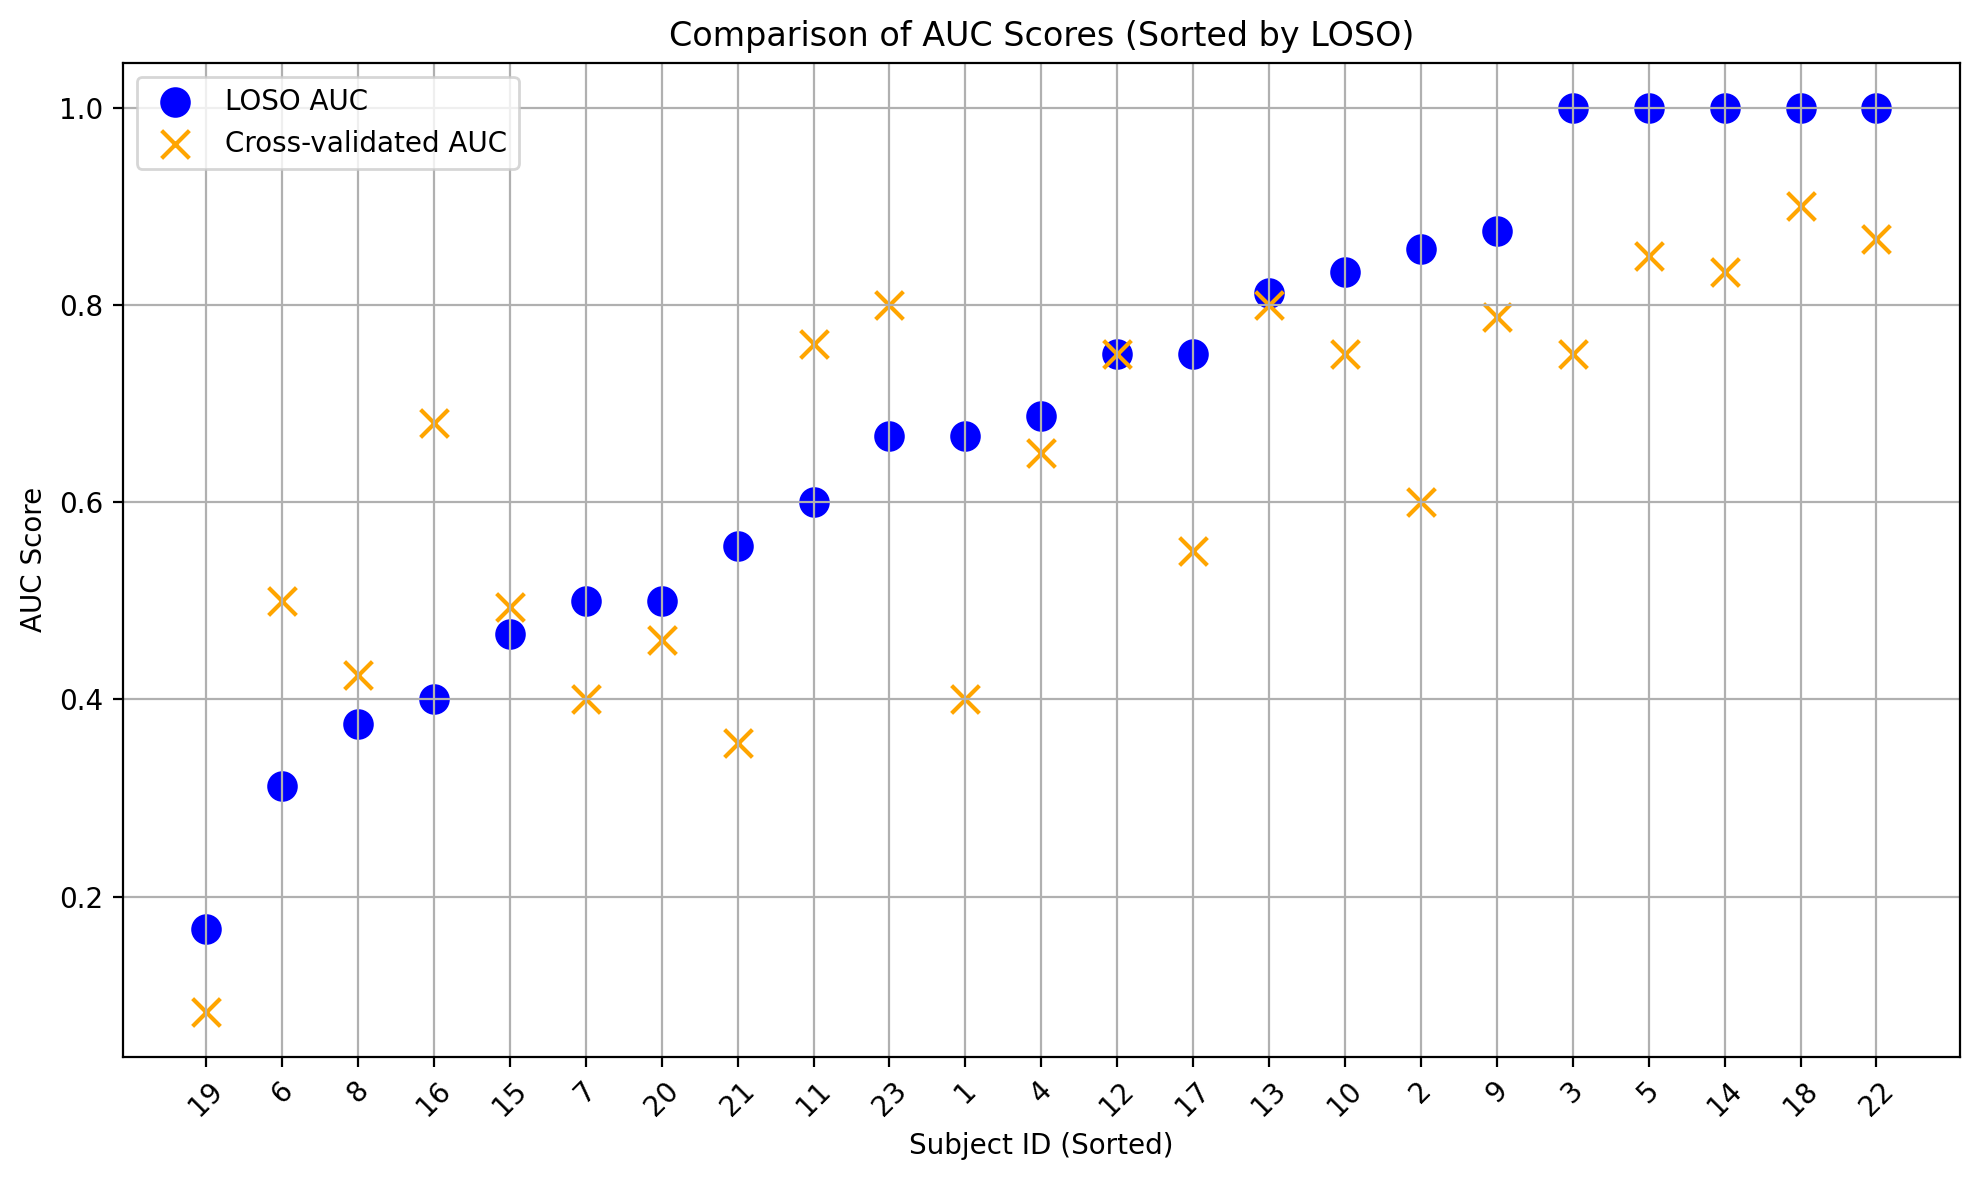

In [281]:
# Sort the subjects based on the LOSO AUC scores and get their indices
sorted_subject_indices = sorted(range(len(dates_loso)), key=lambda i: list(dates_loso.values())[i])

# Extract and sort LOSO and cross-validated AUC scores according to the sorted indices
sorted_loso_scores = [list(dates_loso.values())[i] for i in sorted_subject_indices]
sorted_cross_scores = [list(dates_cross.values())[i] for i in sorted_subject_indices]

# Generate index for subjects to plot on x-axis
x_index = np.arange(len(dates_loso))

# Plotting the scatter plot
plt.figure(figsize=(10, 6),dpi=200)
plt.scatter(x_index, sorted_loso_scores, color='blue', label='LOSO AUC', s=100)
plt.scatter(x_index, sorted_cross_scores, color='orange', marker='x', label='Cross-validated AUC', s=100)

# Add legend
plt.legend()

# Add titles and labels
plt.title('Comparison of AUC Scores (Sorted by LOSO)')
plt.xlabel('Subject ID (Sorted)')
plt.ylabel('AUC Score')

# Set the x ticks to correspond to the sorted subject IDs
plt.xticks(x_index, [i+1 for i in sorted_subject_indices], rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
# Save the plot as a high-resolution PNG image
plt.savefig('final_pics/auc_loso.png', format='png', dpi=300)
plt.show()

In [282]:
all_results_loso={}
select_results_loso={}
for behavior_flag in range(1,2):
    for affective_flag in range(1,2):
        for question_flag in range(1,2):
            for select_flag in range(1,2):
                for eeg_flag in range(2):
                    if(behavior_flag+affective_flag+question_flag+eeg_flag==0):
                        continue
                    dates_loso=get_every_results_withplot_loso(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag)
                    print("参数设置：",behavior_flag,affective_flag,question_flag,select_flag,eeg_flag)
                    print(dates_loso,'\n')
                    all_results_loso[(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag)]=dates_loso
                    if(select_flag==1):
                        select_results_loso[(behavior_flag,affective_flag,question_flag,select_flag,eeg_flag)]=dates_loso

(159, 14)
Number of 0's: 70
Number of 1's: 89
参数设置： 1 1 1 1 0
{'fanhao': 1.0, 'dongyimeng': 0.8571428571428571, 'houlinzhi': 0.8333333333333334, 'jiwenjun': 0.6875, 'miaoshengze': 0.5, 'wanfangwei': 0.625, 'wangxiaoting': 0.3333333333333333, 'wangzhengni': 0.5, 'yangchen': 0.8125, 'huqifan': 1.0, 'zhangxue': 1.0, 'liangqihang': 0.5833333333333333, 'daisiwei': 0.8125, 'zhangyutong': 0.8333333333333333, 'mengfanjie': 0.8, 'zhangchenxi': 0.7333333333333334, 'liangyanshu': 0.75, 'cangyueyang': 1.0, 'hongyurui': 0.3333333333333333, 'lujianing': 0.9, 'zhaochensong': 0.22222222222222224, 'chenrong': 0.9166666666666666, 'chenxingyu': 0.9166666666666667} 

(159, 22)
Number of 0's: 70
Number of 1's: 89
参数设置： 1 1 1 1 1
{'fanhao': 0.33333333333333337, 'dongyimeng': 0.7142857142857143, 'houlinzhi': 1.0, 'jiwenjun': 0.75, 'miaoshengze': 1.0, 'wanfangwei': 0.5, 'wangxiaoting': 0.5, 'wangzhengni': 0.375, 'yangchen': 0.875, 'huqifan': 0.75, 'zhangxue': 0.8, 'liangqihang': 0.75, 'daisiwei': 0.875, 'zhan

In [283]:
select_results_loso

{(1, 1, 1, 1, 0): {'fanhao': 1.0,
  'dongyimeng': 0.8571428571428571,
  'houlinzhi': 0.8333333333333334,
  'jiwenjun': 0.6875,
  'miaoshengze': 0.5,
  'wanfangwei': 0.625,
  'wangxiaoting': 0.3333333333333333,
  'wangzhengni': 0.5,
  'yangchen': 0.8125,
  'huqifan': 1.0,
  'zhangxue': 1.0,
  'liangqihang': 0.5833333333333333,
  'daisiwei': 0.8125,
  'zhangyutong': 0.8333333333333333,
  'mengfanjie': 0.8,
  'zhangchenxi': 0.7333333333333334,
  'liangyanshu': 0.75,
  'cangyueyang': 1.0,
  'hongyurui': 0.3333333333333333,
  'lujianing': 0.9,
  'zhaochensong': 0.22222222222222224,
  'chenrong': 0.9166666666666666,
  'chenxingyu': 0.9166666666666667},
 (1, 1, 1, 1, 1): {'fanhao': 0.33333333333333337,
  'dongyimeng': 0.7142857142857143,
  'houlinzhi': 1.0,
  'jiwenjun': 0.75,
  'miaoshengze': 1.0,
  'wanfangwei': 0.5,
  'wangxiaoting': 0.5,
  'wangzhengni': 0.375,
  'yangchen': 0.875,
  'huqifan': 0.75,
  'zhangxue': 0.8,
  'liangqihang': 0.75,
  'daisiwei': 0.875,
  'zhangyutong': 0.6666666

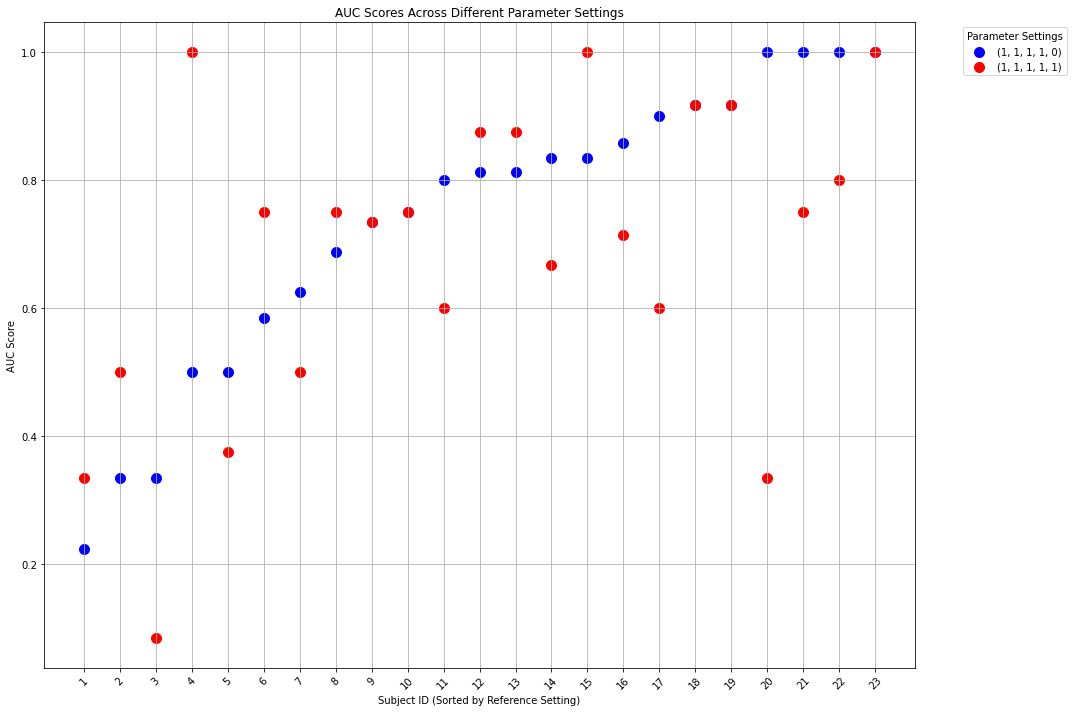

In [285]:
# Sorting subjects based on the AUC scores under the (1, 1, 1, 1, 1) setting
reference_setting = (1, 1, 1, 1, 0)
reference_auc_scores = select_results_loso.get(reference_setting, {})

# Sort subject IDs based on their AUC scores under the reference setting
sorted_subject_ids = sorted(reference_auc_scores, key=reference_auc_scores.get)

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']  # Add more colors if needed
param_labels = list(select_results_loso.keys())

# Loop through each parameter setting
for i, param_setting in enumerate(param_labels):
    auc_scores = select_results_loso[param_setting]
    x_pos = np.arange(len(sorted_subject_ids))  # Offset each parameter setting for clarity

    # Get the AUC scores for each subject in the sorted order of the reference setting
    subject_scores = [auc_scores.get(subject_id, None) for subject_id in sorted_subject_ids]

    # Scatter plot for each parameter setting
    ax.scatter(x_pos, subject_scores, color=colors[i % len(colors)], label=str(param_setting), s=100)

# Customizing the plot
ax.set_xticks(np.arange(len(sorted_subject_ids)))
ax.set_xticklabels(range(1, len(sorted_subject_ids) + 1), rotation=45)
ax.set_title('AUC Scores Across Different Parameter Settings')
ax.set_xlabel('Subject ID (Sorted by Reference Setting)')
ax.set_ylabel('AUC Score')
ax.legend(title='Parameter Settings', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

(159, 26)
Number of 0's: 70
Number of 1's: 89
Accuracy scores for each fold: [0.59375   0.5625    0.53125   0.34375   0.4516129]
Average accuracy: 0.4965725806451613
AUC scores for each fold: [0.59920635 0.53968254 0.58730159 0.44047619 0.5       ]
Average AUC: 0.5333333333333334


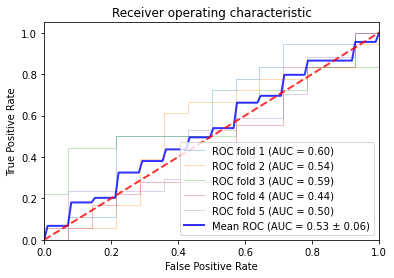

In [117]:
#跨被试任务，二分类，预测其case的field study环境设置。
dates=['fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
       'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing',
       'zhaochensong','chenrong','chenxingyu']
dates_accuracy={}
dates_auc={}
dates_f1={}
feature_name="hope_features"
selected_band=3
# 初始化全局变量
X = []  # 存储所有被试的EEG特征
Y = []  # 存储所有被试的对应的FIELD study倾向
eeg_data=[]
log_data=[]
groups = []  # 存储每个样本对应的被试标识
def check_v_in_v2info(v, v2info_LAB):
    try:
        # Attempt to access the value associated with v1 in v2info_LAB1
        value = v2info_LAB[v]
    except KeyError:
        # If v1 is not in v2info_LAB1, a KeyError exception is caught and the function returns 1
        return 1
    # If no exception is raised, it means v1 is in v2info_LAB1, and the function can return 0 or the value
    return 0
for date in dates:
    v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
    idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
    v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
    idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))
    for v1 in v2info_LAB1.keys():
        for v2 in v2info_LAB2.keys():
            if(check_string(v1)==0):
                continue
            if(v2info_LAB1[v1]['video_type'] >0):
                continue
            if(v2info_LAB2[v2]['video_type'] >0):
                continue
            v1_fu=v1.replace("正面","负面")
            v2_fu=v2.replace("正面","负面")
            if(check_v_in_v2info(v1_fu,v2info_LAB1) or check_v_in_v2info(v2_fu,v2info_LAB2)):
                continue
            if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2 or 'idx' not in v2info_LAB1[v1_fu].keys():
                continue
            if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2 or 'idx' not in v2info_LAB2[v2_fu].keys():
                continue
            if(compare_strings(v1,v2)):
                #print(date,v1)
                feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])
                feature_1_negative = np.array(idx2de_LAB1[str(v2info_LAB1[v1_fu]['idx'])])
                feature_2_negative = np.array(idx2de_LAB2[str(v2info_LAB2[v2_fu]['idx'])])
                feature_1_va= v2info_LAB1[v1]['valence']
                feature_2_va= v2info_LAB2[v2]['valence']
                feature_1_ro= v2info_LAB1[v1]['arousal']
                feature_2_ro= v2info_LAB2[v2]['arousal']
                feature_1_time= v2info_LAB1[v1]['play_duration']
                feature_2_time= v2info_LAB2[v2]['play_duration']
                feature_1_like= v2info_LAB1[v1]['like']
                feature_2_like= v2info_LAB2[v2]['like']
                feature_1_question = v2info_LAB1[v1]['question']
                feature_2_question = v2info_LAB2[v2]['question']
                feature_1_va_negative=v2info_LAB1[v1_fu]['valence']
                feature_2_va_negative=v2info_LAB2[v2_fu]['valence']
                feature_1_ro_negative= v2info_LAB1[v1_fu]['arousal']
                feature_2_ro_negative= v2info_LAB2[v2_fu]['arousal']
                feature_1_time_negative= v2info_LAB1[v1_fu]['play_duration']
                feature_2_time_negative= v2info_LAB2[v2_fu]['play_duration']
                feature_1_like_negative= v2info_LAB1[v1_fu]['like']
                feature_2_like_negative= v2info_LAB2[v2_fu]['like']
                #测试随机结果
                random_number = random.randint(0, 1)
                #for i in range(feature_1.shape[0]):
                if(len(feature_1)==len(feature_2_negative)):
                #for i in range(1):
                    if(feature_2.shape != feature_1.shape):
                        break
                    if(feature_2_negative.shape != feature_1_negative.shape):
                        break
                    feature = np.concatenate((feature_1, feature_2), axis=0)
                    # 合并加权后的特征
                    #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                    #print(feature[i].shape)
                    flattened_feature = feature.flatten()
                    #log_info=np.array([feature_1_va,feature_2_va,feature_1_ro,feature_2_ro,feature_1_like,feature_2_like,feature_1_time,feature_2_time])
                    if not X or len(flattened_feature) == len(X[0]):
                        X.append(flattened_feature)
                        #log_data.append(np.array([feature_1_ro,feature_2_ro,feature_1_ro_negative,feature_2_ro_negative]))
                        #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative,feature_1_time_negative,feature_2_time_negative,feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                        log_data.append(np.array([feature_1_time_negative,feature_2_time_negative,feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                        #log_data.append(np.array([feature_1_time_negative,feature_2_time_negative]))
                        #log_data.append(np.array([feature_1_like,feature_2_like,feature_1_like_negative,feature_2_like_negative]))
                        #log_data.append(np.array([feature_1_question,feature_2_question,feature_1_va,feature_2_va,feature_1_va_negative,feature_2_va_negative]))
                        eeg_data.append(flattened_feature)
                        Y.append(v2info_LAB2[v2]['tend'])
                        #Y.append(random_number)
                        groups.append(date)  # 为每个样本添加被试标识
                    else:
                        print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
# 转换为NumPy数组
X = np.array(X)
    #print(X.shape)

# 特征缩放
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_data)
# 修改PCA降维的组件数量
pca = PCA(n_components=20)  # 根据需要调整n_components
eeg_pca = pca.fit_transform(eeg_scaled)
# 增加日志数据的权重
#log_data_weighted = np.tile(log_data * 2, (eeg_pca.shape[0], 1))  # 调整权重因子
# 水平合并特征
combined_features = np.hstack((np.array(log_data), eeg_pca))
#combined_features = np.array(log_data)
#combined_features = np.array(eeg_scaled)
X=combined_features

Y = np.array(Y)
print(X.shape)
    #print("Y均值：",Y.mean())
# 展示 Y 中 0 和 1 的数量
num_zeros = sum(Y == 0)
num_ones = sum(Y == 1)
print(f"Number of 0's: {num_zeros}")
print(f"Number of 1's: {num_ones}")

# 创建并训练分类模型
# 创建 SVM 分类模型
#classifier = SVC(probability=True)
# 创建梯度提升分类模型
#classifier = GradientBoostingClassifier(n_estimators=100)
# 创建 XGBoost 分类模型
classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
#classifier = RandomForestClassifier()  # 可以选择其他分类器
#classifier = RandomForestClassifier()  # 可以选择其他分类器
# 准备进行五折交叉验证并同时计算准确率和 AUC
cv = StratifiedKFold(n_splits=5)
scoring = ['accuracy', 'roc_auc']
cv_results = cross_validate(classifier, X, Y, cv=cv, scoring=scoring, return_estimator=True)

print("Accuracy scores for each fold:", cv_results['test_accuracy'])
print("Average accuracy:", np.mean(cv_results['test_accuracy']))
print("AUC scores for each fold:", cv_results['test_roc_auc'])
print("Average AUC:", np.mean(cv_results['test_roc_auc']))

# 绘制 ROC 曲线
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
tprs = []
aucs = []

for i, (train, test) in enumerate(cv.split(X, Y)):
    # 使用测试集索引来为这一折生成ROC曲线
    scores = cv_results['estimator'][i].predict_proba(X[test])[:, 1]
    fpr, tpr, _ = roc_curve(Y[test], scores)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    ax.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='blue', lw=2, alpha=0.8,
        label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', alpha=0.8)
ax.set(xlim=[0.0, 1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', ylabel='True Positive Rate', title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.show()

In [94]:
np.array(log_data).shape

(5040, 4)

In [ ]:
#BASELINE 打乱的y
# 【优化后的代码】看所有类型视频：LAB1、LAB2p、LAB2n做RMANOVA
dates=['fanhao', 'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
       'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang', 'hongyurui','lujianing'
       'zhaochensong','chenxingyu','chenrong'
       ]

results_dict_all = {}
results_dict_yes = {}
pb_difference={}

# Preload JSON data
v2info_LAB1_data = {}
v2info_LAB2_data = {}
idx2de_LAB1_data = {}
idx2de_LAB2_data = {}

for date in dates:
    v2info_LAB1_data[date] = json.load(open(f'./v2info/LAB1-{date}_v2info.json'))
    idx2de_LAB1_data[date] = json.load(open(f'./hope_features/LAB1-{date}_idx2de.json'))
    v2info_LAB2_data[date] = json.load(open(f'./v2info/LAB2-{date}_v2info.json'))
    idx2de_LAB2_data[date] = json.load(open(f'./hope_features/LAB2-{date}_idx2de.json'))
X = []
Y = []
groups=[]

for date in dates:
    # LAB1 和 LAB2 数据处理
    for dataset in [(v2info_LAB1_data, idx2de_LAB1_data), (v2info_LAB2_data, idx2de_LAB2_data)]:
        v2info_data, idx2de_data = dataset

        for v, info in v2info_data[date].items():
            if info['valence'] == 'nan':
                continue
            if check_string(v) and 'idx' in info:
                feature = np.array(idx2de_data[date][str(info['idx'])])
                if info['video_type'] in [0]:
                #if(1):
                    #random_bit = random.randint(0, 1)
                    for i in range(feature.shape[0]):
                        # 拉平 62x5 矩阵
                        flattened_feature = feature[i].flatten()
                        if info['valence'] > 6:
                            Y.append(1)  # Positive
                            X.append(flattened_feature)
                            groups.append(date+v)
                        elif info['valence'] < 4:
                            Y.append(0)  # Negative
                            X.append(flattened_feature)
                            groups.append(date+v)

# 将 X 和 Y 转换为 NumPy 数组
X = np.array(X)
Y = np.array(Y)
Y_pri=Y
# 将 Y 和 groups 组合在一起
combined = list(zip(Y, groups))

# 按组分割 Y 和 groups 的组合
grouped = {grp: [] for grp in np.unique(groups)}
for y, grp in combined:
    grouped[grp].append(y)

# 打乱组的顺序
shuffled_group_keys = shuffle(list(grouped.keys()))

# 创建一个空的 Y_shuffled 列表来存放打乱后的 Y
Y_shuffled = []

# 根据打乱后的组顺序重组 Y
for grp in shuffled_group_keys:
    Y_shuffled.extend(grouped[grp])

# 将 Y_shuffled 转换为 NumPy 数组
Y_shuffled = np.array(Y_shuffled)

Y=Y_shuffled

# 展示 Y 中 0 和 1 的数量
num_zeros = sum(Y == 0)
num_ones = sum(Y == 1)
print(f"Number of 0's: {num_zeros}")
print(f"Number of 1's: {num_ones}")

# 创建并训练分类模型
# 创建 SVM 分类模型
#classifier = SVC(probability=True)
# 创建梯度提升分类模型
#classifier = GradientBoostingClassifier(n_estimators=100)
# 创建 XGBoost 分类模型
classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
#classifier = RandomForestClassifier()  # 可以选择其他分类器
#classifier = RandomForestClassifier()  # 可以选择其他分类器
# 准备进行五折交叉验证并同时计算准确率和 AUC
cv = StratifiedKFold(n_splits=5)
scoring = ['accuracy', 'roc_auc']
cv_results = cross_validate(classifier, X, Y, cv=cv, scoring=scoring, return_estimator=True)

print("Accuracy scores for each fold:", cv_results['test_accuracy'])
print("Average accuracy:", np.mean(cv_results['test_accuracy']))
print("AUC scores for each fold:", cv_results['test_roc_auc'])
print("Average AUC:", np.mean(cv_results['test_roc_auc']))

# 绘制 ROC 曲线
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
tprs = []

for i, (train, test) in enumerate(cv.split(X, Y)):
    # 使用测试集索引来为这一折生成ROC曲线
    scores = cv_results['estimator'][i].predict_proba(X[test])[:, 1]
    fpr, tpr, _ = roc_curve(Y[test], scores)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='blue', lw=2, alpha=0.8,
        label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', alpha=0.8)
ax.set(xlim=[0.0, 1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', ylabel='True Positive Rate', title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.show()

In [153]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        # 假设输入尺寸为 [2, 10, 62, 5]
        # 添加卷积层
        self.conv1 = nn.Conv2d(in_channels=2, out_channels=32, kernel_size=(3, 3), stride=(1, 1))
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=(1, 1))

        # 计算卷积层输出后的大小
        # 这里需要根据实际卷积层的配置和您的输入数据来计算
        conv_output_size = self._get_conv_output([2, 10, 62, 5])

        # 全连接层
        self.fc1 = nn.Linear(conv_output_size, 32)  # 根据卷积输出调整
        self.fc2 = nn.Linear(32, 1)  # 二分类输出

    def forward(self, x):
        # 应用卷积层和ReLU激活函数
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        # 展平卷积层输出
        x = torch.flatten(x, 1)

        # 全连接层
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

    def _get_conv_output(self, shape):
        # 使用临时数据流通过卷积层以计算输出大小
        batch_size = 1
        input = torch.autograd.Variable(torch.rand(batch_size, *shape))
        output_feat = self._forward_features(input)
        n_size = output_feat.data.view(batch_size, -1).size(1)
        return n_size

    def _forward_features(self, x):
        # 卷积层的前向传播
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x

In [154]:
#单被试任务，二分类，对于每个被试，预测其case的field study环境设置。
dates=[  'dongyimeng', 'houlinzhi', 'jiwenjun',  'miaoshengze','wanfangwei','wangxiaoting', 'wangzhengni', 'yangchen', 'huqifan',
       'zhangxue','liangqihang', 'daisiwei', 'zhangyutong', 'mengfanjie', 'zhangchenxi', 'liangyanshu','cangyueyang','hongyurui','lujianing',
       ]
dates_accuracy={}
dates_auc={}
dates_f1={}
feature_name="higher_features"
selected_band=3
for date in dates:
    X = []  # 存储EEG特征
    Y = []  # 存储对应的FIELD study倾向
    groups = []  # 存储每个样本对应的被试标识
    v2info_LAB1 = json.load(open('./v2info/'+'LAB1-'+date+'_v2info.json'))
    idx2de_LAB1 = json.load(open('./'+feature_name+'/'+'LAB1-'+date+'_idx2de.json'))
    v2info_LAB2 = json.load(open('./v2info/'+'LAB2-'+date+'_v2info.json'))
    idx2de_LAB2 = json.load(open('./'+feature_name+'/'+'LAB2-'+date+'_idx2de.json'))
    for v1 in v2info_LAB1.keys():
        for v2 in v2info_LAB2.keys():
            #if(check_string(v1)==0):
                #continue
            if(v2info_LAB1[v1]['video_type'] == 1):
                continue
            if(v2info_LAB2[v2]['video_type'] == 1):
                continue
            if 'idx' not in v2info_LAB1[v1].keys() or v2info_LAB1[v1]['tend'] == 2:
                continue
            if 'idx' not in v2info_LAB2[v2].keys() or v2info_LAB2[v2]['tend'] == 2:
                continue
            if(compare_strings(v1,v2)):
                #print("v1:",v1)
                feature_1 = np.array(idx2de_LAB1[str(v2info_LAB1[v1]['idx'])])
                feature_2 = np.array(idx2de_LAB2[str(v2info_LAB2[v2]['idx'])])
                if(feature_2.shape != feature_1.shape):
                    continue
                    #selected_feature_1=feature_1[:,:,selected_band]
                    #selected_feature_2=feature_2[:,:,selected_band]
                    #feature = np.concatenate((selected_feature_1, selected_feature_2), axis=0)
                    #feature = np.concatenate((feature_1, feature_2), axis=0)
                    #print(selected_feature_1.shape)
                    #print(selected_feature_2.shape)
                feature=np.stack((feature_1,feature_2))
                    #print(feature.shape)
                    #print(feature.shape)
                    #feature=feature_2
                    #feature=selected_feature_1
                    # 设置权重，因为 feature2 更重要，我们给它更高的权重
                    #weight1 = 0.5  # feature1 的权重
                    #weight2 = 1.0  # feature2 的权重
                    # 加权特征
                    #weighted_feature1 = feature_1 * weight1
                    #weighted_feature2 = feature_2 * weight2
                    # 合并加权后的特征
                    #feature = np.concatenate((weighted_feature1, weighted_feature2), axis=1)
                print(feature.shape)
                    #flattened_feature = feature[i].flatten().tolist()
                flattened_feature=feature
                if not X or len(flattened_feature) == len(X[0]):
                    X.append(flattened_feature)
                    Y.append(v2info_LAB1[v1]['tend'])
                    groups.append(v1)  # 为每个样本添加被试标识
                else:
                    print(f"Length mismatch in feature for index {v1}: Expected {len(X[0])}, got {len(flattened_feature)}")
    # 转换为NumPy数组
    X = np.array(X)
    #print(X.shape)
    Y = np.array(Y)
    #print(Y)
    #print("Y均值：",Y.mean())
    groups = np.array(groups)
    #Y=process_labels(Y)
    #不跨被试
    # 初始化 KFold 用于5折交叉验证
    kf = KFold(n_splits=5, shuffle=True, random_state=12)
    # 初始化GroupKFold
    #gkf = GroupKFold(n_splits=2)
    # 定义交叉验证器
    #kf = KFold(n_splits=2,shuffle=True, random_state=1)  # 可以自定义折数，这里使用5折交叉验证
    #用于存储每次分割的准确度和AUC
    accuracies = []
    aucs = []
    f1_scores = []

    print(X.shape)    
    # 进行交叉验证
    for train_idx, test_idx in kf.split(X, Y):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        #print(Y_test)
       # 获取维度信息
        num_samples, time_series, feature_height, electrodes, bands = X_train.shape

# 重塑数据为二维
        X_train_reshaped = X_train.reshape(-1, bands)
        X_test_reshaped = X_test.reshape(-1, bands)
# 初始化MinMaxScaler
        scaler = MinMaxScaler()

# 对训练数据进行拟合和转换
        X_train_scaled = scaler.fit_transform(X_train_reshaped)

# 使用相同的归一化器转换测试数据
        X_test_scaled = scaler.transform(X_test_reshaped)
# 将归一化后的数据还原为五维
        X_train_scaled = X_train_scaled.reshape(num_samples, time_series, feature_height, electrodes, bands)
        X_test_scaled = X_test_scaled.reshape(-1, time_series, feature_height, electrodes, bands)  # '-1' 用于自动计算样本数
        # 训练模型
        #model = RandomForestClassifier()
        #model = XGBClassifier()
        X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32)
        X_test_scaled = torch.tensor(X_test_scaled, dtype=torch.float32)
        Y_train = torch.tensor(Y_train, dtype=torch.float32)
        print(X_train_scaled.shape)
        print(Y_train.shape)
        train_dataset = TensorDataset(X_train_scaled, Y_train)
        trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

        model = SimpleNet()
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
        model.train()
        for epoch in range(100):
            for inputs, labels in trainloader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels.unsqueeze(1))  # Adjust label dimensions if necessary
                loss.backward()
                optimizer.step()

    # Testing loop
        model.eval()
        test_dataset = TensorDataset(X_test_scaled, Y_test)
        testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = model(inputs)
                predicted = (outputs >= 0.5).float()  # Using 0.5 as the threshold
                total += labels.size(0)
                correct += (predicted == labels.unsqueeze(1)).sum().item()

        accuracy =  correct / total
        accuracies.append(accuracy)
    # 计算平均准确度和平均AUC
    average_accuracy = np.mean(accuracies)
    average_auc = np.mean(aucs)
    average_f1 = np.mean(f1_scores)
    print("Average Accuracy:", average_accuracy)
    print("Average AUC:", average_auc)
    print("Average F1 Score:", average_f1)
    print("\n")
    dates_accuracy[date]=average_accuracy
    dates_auc[date]=average_auc
    dates_f1[date]=average_f1
full_accuracy=[]
for v in dates_accuracy.keys():
    full_accuracy.append(dates_accuracy[v])
print("所有被试平均单被试预测field study环境的准确率：",np.array(full_accuracy).mean())
full_auc=[]
for v in dates_auc.keys():
    full_auc.append(dates_auc[v])
print("所有被试平均单被试预测field study环境的AUC：",np.array(full_auc).mean())
full_f1=[]
for v in dates_f1.keys():
    full_f1.append(dates_f1[v])
print("所有被试平均单被试预测field study环境的F1 score：",np.array(full_f1).mean())

(2, 10, 62, 5)
(2, 10, 62, 5)
(2, 10, 62, 5)
(2, 10, 62, 5)
(2, 10, 62, 5)
(2, 10, 62, 5)
(2, 10, 62, 5)
(2, 10, 62, 5)
(2, 10, 62, 5)
(2, 10, 62, 5)
(10, 2, 10, 62, 5)
torch.Size([8, 2, 10, 62, 5])
torch.Size([8])


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [32, 2, 3, 3], but got 5-dimensional input of size [1, 2, 10, 62, 5] instead

In [138]:
pip uninstall tensorflow


^C
Note: you may need to restart the kernel to use updated packages.
